In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
!pip install plotly
import plotly.express as px
import json

# Load Data

In [4]:
BR_df = pd.read_csv('final/BR_youtube_trending_data.csv')
CA_df = pd.read_csv('final/CA_youtube_trending_data.csv')
DE_df = pd.read_csv('final/DE_youtube_trending_data.csv')
FR_df = pd.read_csv('final/FR_youtube_trending_data.csv')
GB_df = pd.read_csv('final/GB_youtube_trending_data.csv')
IN_df = pd.read_csv('final/IN_youtube_trending_data.csv')
JP_df = pd.read_csv('final/JP_youtube_trending_data.csv')
KR_df = pd.read_csv('final/KR_youtube_trending_data.csv')
MX_df = pd.read_csv('final/MX_youtube_trending_data.csv')
RU_df = pd.read_csv('final/RU_youtube_trending_data.csv')
US_df = pd.read_csv('final/US_youtube_trending_data.csv')

Load Category from JSON

In [5]:
categories = pd.read_json("final/US_category_id.json")

In [6]:
categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."


In [7]:
categories['items'][0]['snippet']['title']

'Film & Animation'

In [8]:
category_df = pd.json_normalize(categories['items'])

In [9]:
category_df

,kind,etag,id,snippet.title,snippet.assignable,snippet.channelId
0,youtube#videoCategory,IfWa37JGcqZs-jZeAyFGkbeh6bc,1,Film & Animation,True,UCBR8-60-B28hp2BmDPdntcQ
1,youtube#videoCategory,5XGylIs7zkjHh5940dsT5862m1Y,2,Autos & Vehicles,True,UCBR8-60-B28hp2BmDPdntcQ
2,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
3,youtube#videoCategory,ra8H7xyAfmE2FewsDabE3TUSq10,15,Pets & Animals,True,UCBR8-60-B28hp2BmDPdntcQ
4,youtube#videoCategory,7mqChSJogdF3hSIL-88BfDE-W8M,17,Sports,True,UCBR8-60-B28hp2BmDPdntcQ
5,youtube#videoCategory,0Z6uGkj97NgjD-X3pkA-nL18Hqk,18,Short Movies,False,UCBR8-60-B28hp2BmDPdntcQ
6,youtube#videoCategory,K_-7stg0kIU7eUBOPUa6j5fqIMQ,19,Travel & Events,True,UCBR8-60-B28hp2BmDPdntcQ
7,youtube#videoCategory,I3IL9xGIM3MsULlqR4tvCsEKv98,20,Gaming,True,UCBR8-60-B28hp2BmDPdntcQ
8,youtube#videoCategory,D1W6tq5mMMCV0wtNxf9A6g9wWjU,21,Videoblogging,False,UCBR8-60-B28hp2BmDPdntcQ
9,youtube#videoCategory,QMEBz6mxVdklVaq8JwesPEw_4nI,22,People & Blogs,True,UCBR8-60-B28hp2BmDPdntcQ


In [10]:
category_df.shape

(32, 6)

In [11]:
del category_df['kind']
del category_df['etag']
del category_df['snippet.assignable']
del category_df['snippet.channelId']

In [12]:
category_df

,id,snippet.title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [13]:
category_df['snippet.title']

0          Film & Animation
1          Autos & Vehicles
2                     Music
3            Pets & Animals
4                    Sports
5              Short Movies
6           Travel & Events
7                    Gaming
8             Videoblogging
9            People & Blogs
10                   Comedy
11            Entertainment
12          News & Politics
13            Howto & Style
14                Education
15     Science & Technology
16    Nonprofits & Activism
17                   Movies
18          Anime/Animation
19         Action/Adventure
20                 Classics
21                   Comedy
22              Documentary
23                    Drama
24                   Family
25                  Foreign
26                   Horror
27           Sci-Fi/Fantasy
28                 Thriller
29                   Shorts
30                    Shows
31                 Trailers
Name: snippet.title, dtype: object

In [15]:
categories['items'][0]['snippet']['title']

'Film & Animation'

In [16]:
# convert category_df to dictionary
category_dict = category_df.set_index('id').T.to_dict('list')

category_dict

{'1': ['Film & Animation'],
 '2': ['Autos & Vehicles'],
 '10': ['Music'],
 '15': ['Pets & Animals'],
 '17': ['Sports'],
 '18': ['Short Movies'],
 '19': ['Travel & Events'],
 '20': ['Gaming'],
 '21': ['Videoblogging'],
 '22': ['People & Blogs'],
 '23': ['Comedy'],
 '24': ['Entertainment'],
 '25': ['News & Politics'],
 '26': ['Howto & Style'],
 '27': ['Education'],
 '28': ['Science & Technology'],
 '29': ['Nonprofits & Activism'],
 '30': ['Movies'],
 '31': ['Anime/Animation'],
 '32': ['Action/Adventure'],
 '33': ['Classics'],
 '34': ['Comedy'],
 '35': ['Documentary'],
 '36': ['Drama'],
 '37': ['Family'],
 '38': ['Foreign'],
 '39': ['Horror'],
 '40': ['Sci-Fi/Fantasy'],
 '41': ['Thriller'],
 '42': ['Shorts'],
 '43': ['Shows'],
 '44': ['Trailers']}

In [17]:
# add category name to df

#US
for key, value in category_dict.items():
    US_df.loc[US_df['categoryId'] == int(key), 'category'] = value[0]

#BR
for key, value in category_dict.items():
    BR_df.loc[BR_df['categoryId'] == int(key), 'category'] = value[0]

#CA
for key, value in category_dict.items():
    CA_df.loc[CA_df['categoryId'] == int(key), 'category'] = value[0]

#DE
for key, value in category_dict.items():
    DE_df.loc[DE_df['categoryId'] == int(key), 'category'] = value[0]

#FR
for key, value in category_dict.items():
    FR_df.loc[FR_df['categoryId'] == int(key), 'category'] = value[0]

#GB
for key, value in category_dict.items():
    GB_df.loc[GB_df['categoryId'] == int(key), 'category'] = value[0]

#IN
for key, value in category_dict.items():
    IN_df.loc[IN_df['categoryId'] == int(key), 'category'] = value[0]

#JP
for key, value in category_dict.items():
    JP_df.loc[JP_df['categoryId'] == int(key), 'category'] = value[0]

#KR
for key, value in category_dict.items():
    KR_df.loc[KR_df['categoryId'] == int(key), 'category'] = value[0]

#MX
for key, value in category_dict.items():
    MX_df.loc[MX_df['categoryId'] == int(key), 'category'] = value[0]

#RU
for key, value in category_dict.items():
    RU_df.loc[RU_df['categoryId'] == int(key), 'category'] = value[0]



In [18]:
US_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168985,bp9N0K8htlY,Am I Doing Vlogmas? | ad,2022-11-24T16:01:10Z,UCrUbqTCagwsaP2Fmr0p1TsA,Zoe Sugg,22,2022-11-30T00:00:00Z,Zoe Sugg|vlog|Zoella|makeup|grwm|get ready wit...,515388,23690,0,568,https://i.ytimg.com/vi/bp9N0K8htlY/default.jpg,False,False,Am I Doing Vlogmas? | adThis video contains a ...,People & Blogs
168986,oTIHLsa0bj0,"Version 3.3 All Senses Clear, All Existence Vo...",2022-11-25T12:45:02Z,UCiS882YPwZt1NfaM0gR0D9Q,Genshin Impact,20,2022-11-30T00:00:00Z,Amber|amber vtuber|genshi|genshi game|genshi i...,1852602,141317,0,5365,https://i.ytimg.com/vi/oTIHLsa0bj0/default.jpg,False,False,There have been a multitude of kaidan and lege...,Gaming
168987,0SyQIPUEJ_0,DDG - Vegan (Official Music Video),2022-11-23T20:12:25Z,UCKqqDlf6lfo3ChRA4-gzusQ,DDG,10,2022-11-30T00:00:00Z,ddg|ddg music|ddg vegan|ddg vegan video|ddg ve...,488652,37337,0,2943,https://i.ytimg.com/vi/0SyQIPUEJ_0/default.jpg,False,False,DDG - Vegan (Official Music Video) 🌱 🌱 🌱 Shot ...,Music
168988,6sh2Ib3DklI,I Tried Walmart's Terrifying Metaverse Experience,2022-11-22T18:00:07Z,UCSUf5_EPEfl4zlBKZHkZdmw,Danny Gonzalez,23,2022-11-30T00:00:00Z,danny gonzalez|funny|commentary|comedy|react|r...,3286660,180207,0,10844,https://i.ytimg.com/vi/6sh2Ib3DklI/default.jpg,False,False,Thanks to ExpressVPN for sponsoring this video...,Comedy


In [19]:
US_df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style


In [20]:
RU_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,e_Z6upbeYuc,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12T09:00:16Z,UC2tsySbe9TNrI-xh2lximHA,A4,24,2020-08-12T00:00:00Z,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,https://i.ytimg.com/vi/e_Z6upbeYuc/default.jpg,False,False,Новые кроссовки Reebok Classic Leather Legacy ...,Entertainment
1,X5j69JMlbwM,DAVA & Филипп Киркоров – РОЛЕКС (Премьера клип...,2020-08-12T09:00:10Z,UCbh7BxJWCMnWLwJ-traa6Wg,DAVA,22,2020-08-12T00:00:00Z,РОЛЕКС|DAVA|Киркоров|2020|музыка в машину|музы...,636749,58770,28133,5051,https://i.ytimg.com/vi/X5j69JMlbwM/default.jpg,False,False,#Dava #ФилиппКиркоров #Ролекс #Music С огромны...,People & Blogs
2,FzJjlIzZlVc,Как Я ЧУТЬ НЕ УМЕР 2 (анимация),2020-08-12T10:00:02Z,UCLNrn6a4Co8D6H7jRZtNPcA,X2DED,1,2020-08-12T00:00:00Z,как я чуть не умер|чуть не умер|история из жиз...,359904,45025,438,2793,https://i.ytimg.com/vi/FzJjlIzZlVc/default.jpg,False,False,Это история анимация о том как я чуть не умер ...,Film & Animation
3,oD3FOzQDuy0,ВЫРВАЛАСЬ и УЛЕТЕЛА!!! / ТУРИЗМ 2020,2020-08-12T09:00:50Z,UCC83eap-hc6uFQHRJ2F2LNg,TheKateClapp,22,2020-08-12T00:00:00Z,катя|клэп|катюша|kate|clapp|детское|школа|смеш...,355978,64073,585,2771,https://i.ytimg.com/vi/oD3FOzQDuy0/default.jpg,False,False,"Вырвалась из КАРАНТИНА! Лучшее, что случилось ...",People & Blogs
4,26gteilUAuQ,Полный контакт / Соловьёв LIVE / 12 августа 20...,2020-08-12T08:43:30Z,UCQ4YOFsXjG9eXWZ6uLj2t2A,Соловьёв LIVE,25,2020-08-12T00:00:00Z,Соловьев|Владимир Соловьев|Соловьев live|solov...,428221,19329,5126,1034,https://i.ytimg.com/vi/26gteilUAuQ/default.jpg,False,False,🌞 Доброе утро!📻 Устанавливаем «Полный контакт»...,News & Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163020,Ut1OzEVUiM4,Red Velvet 레드벨벳 'Birthday' MV,2022-11-28T09:00:14Z,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,2022-11-30T00:00:00Z,레드벨벳|벌쓰데이|벌스데이|생일|아이린|슬기|예리|웬디|조이|뮤직비디오|뮤비|red...,6317130,615684,0,30232,https://i.ytimg.com/vi/Ut1OzEVUiM4/default.jpg,False,False,Red Velvet's mini album 'The ReVe Festival 202...,Music
163021,uB5BcRLSKM8,ДОМ-2. После заката (эфир от 28.11.2022),2022-11-28T21:00:33Z,UCQfIKN4kO8Gdi8-tpV9Dk5Q,ДОМ-2. Новая жизнь,22,2022-11-30T00:00:00Z,[None],165580,759,0,950,https://i.ytimg.com/vi/uB5BcRLSKM8/default.jpg,False,False,Скачай приложение ФОНБЕТ по ссылке: https://cu...,People & Blogs
163022,jSo7AVDEko4,'We Remain Human': Bodies Of Russian Troops Co...,2022-11-28T17:23:31Z,UCG_Qif8SJIS3XxU8iqHoInw,Radio Free Europe/Radio Liberty,25,2022-11-30T00:00:00Z,[None],1472593,16346,0,3239,https://i.ytimg.com/vi/jSo7AVDEko4/default.jpg,False,False,Ukrainian volunteers discovered about 20 bodie...,News & Politics
163023,6SW9VhYs38c,ДОМ-2. Новая жизнь (эфир от 28.11.2022),2022-11-28T20:00:04Z,UCQfIKN4kO8Gdi8-tpV9Dk5Q,ДОМ-2. Новая жизнь,22,2022-11-30T00:00:00Z,[None],209707,1054,0,884,https://i.ytimg.com/vi/6SW9VhYs38c/default.jpg,False,False,Новая участница Дюша Кухальская хочет покорить...,People & Blogs


In [21]:
del BR_df['video_id']
del CA_df['video_id']
del DE_df['video_id']
del FR_df['video_id']
del GB_df['video_id']
del IN_df['video_id']
del JP_df['video_id']
del KR_df['video_id']
del MX_df['video_id']
del RU_df['video_id']
del US_df['video_id']

In [22]:
del BR_df['channelId']
del CA_df['channelId']
del DE_df['channelId']
del FR_df['channelId']
del GB_df['channelId']
del IN_df['channelId']
del JP_df['channelId']
del KR_df['channelId']
del MX_df['channelId']
del RU_df['channelId']
del US_df['channelId']

In [23]:
del BR_df['thumbnail_link']
del CA_df['thumbnail_link']
del DE_df['thumbnail_link']
del FR_df['thumbnail_link']
del GB_df['thumbnail_link']
del IN_df['thumbnail_link']
del JP_df['thumbnail_link']
del KR_df['thumbnail_link']
del MX_df['thumbnail_link']
del RU_df['thumbnail_link']
del US_df['thumbnail_link']

In [24]:
JP_df

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
0,皆からの色々な質問に何も隠さず答える！びっくりさせたらごめん笑,2020-08-11T10:00:06Z,タナカガ,22,2020-08-12T00:00:00Z,[None],778499,34811,667,3939,False,False,登録者数30万人ありがとうございます！！！ご機嫌ようみなさま。お久しぶりでございます。なんか...,People & Blogs
1,【異次元】世界に伝えたい『This is ギータ』【変態打ち】,2020-08-11T13:36:28Z,(パーソル パ・リーグTV公式)PacificLeagueTV,17,2020-08-12T00:00:00Z,パーソルパリーグTV|パリーグTV|パシフィックリーグ|Pacificleague|プロ野球,1161952,18514,259,4115,False,False,言葉が出ない。スゴすぎて、異次元過ぎて、言葉が出ない。左対左、だけど何となく打ちそうな気はし...,Sports
2,【親心】てつやを一番よく知るのは誰？第１回てつやの母親に聞くてつや王！,2020-08-11T12:00:11Z,東海オンエア,23,2020-08-12T00:00:00Z,[None],1980557,63961,692,6216,False,False,それにしても実家に帰ってません。あまりにいつでも帰れるので逆にタイミングが難しくなってます。...,Comedy
3,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146742,2794,16557,False,False,"While running her own modding shop, Ramya Pare...",Gaming
4,映画『銀魂 THE FINAL』特報 2021年1月8日(金)公開,2020-08-11T23:00:00Z,ワーナー ブラザース 公式チャンネル,1,2020-08-12T00:00:00Z,銀魂|gintama|劇場版|空知英秋|杉田智和|釘宮理恵|阪口大助|アニメ|anime|週...,442524,14388,73,1420,False,False,「銀魂」本当のラスト!最後のバカ騒ぎが、始まる!笑いも涙も宇宙規模で限界突破！『銀魂 THE...,Film & Animation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168977,【学園祭ピアノドッキリ】合唱部の幽霊部員が実はプロだったら、廃部の危機を救えるんか？ byよ...,2022-11-19T03:45:11Z,よみぃ,10,2022-11-30T00:00:00Z,ストリートピアノ|よみぃ|鬼滅の刃|ピアノ|弾いてみた|紅白|面白い|太鼓の達人|神動画|お...,887988,17135,0,386,False,False,#ドッキリ #ピアノ #よみぃ◆よみぃオフィシャルサイト 動画撮影裏話なども掲載中！htt...,Music
168978,ポケモンSVのネット対戦が、テラスタルのせいで凄いことになってしまっている。【ポケモンSV実況】,2022-11-21T07:42:51Z,もこうの実況,20,2022-11-30T00:00:00Z,もこう|ゲーム|ゲーム実況動画|ポケモンSV|ポケモン|スカーレットバイオレット|テラスタル...,422054,4495,0,777,False,False,ポケモン本編が楽しすぎてクリアに35時間かかりましたが対戦もぼちぼちやってみます★チャンネル...,Gaming
168979,『SPY×FAMILY』フィオナ役キャスト解禁PV,2022-11-19T14:28:00Z,TOHO animation チャンネル,1,2022-11-30T00:00:00Z,東宝|TOHO|anime|公式|オフィシャル|アニメ|Entertainment|配給|宣...,1470654,0,0,0,False,True,TVアニメ『SPY×FAMILY』MISSION:20「総合病院を調査せよ／難解な暗号を解読...,Film & Animation
168980,日本の街中にある英語の案内が間違いだらけすぎるww,2022-11-20T10:00:30Z,Kevin's English Room / 掛山ケビ志郎,24,2022-11-30T00:00:00Z,English|Kevin's English room|Kevin|英語|ケビン|tikt...,1063999,29042,0,1150,False,False,英語で書いてあるだけ優しい！！！★3人で作った本が出版されました！購入はこちらから↓電子版や...,Entertainment


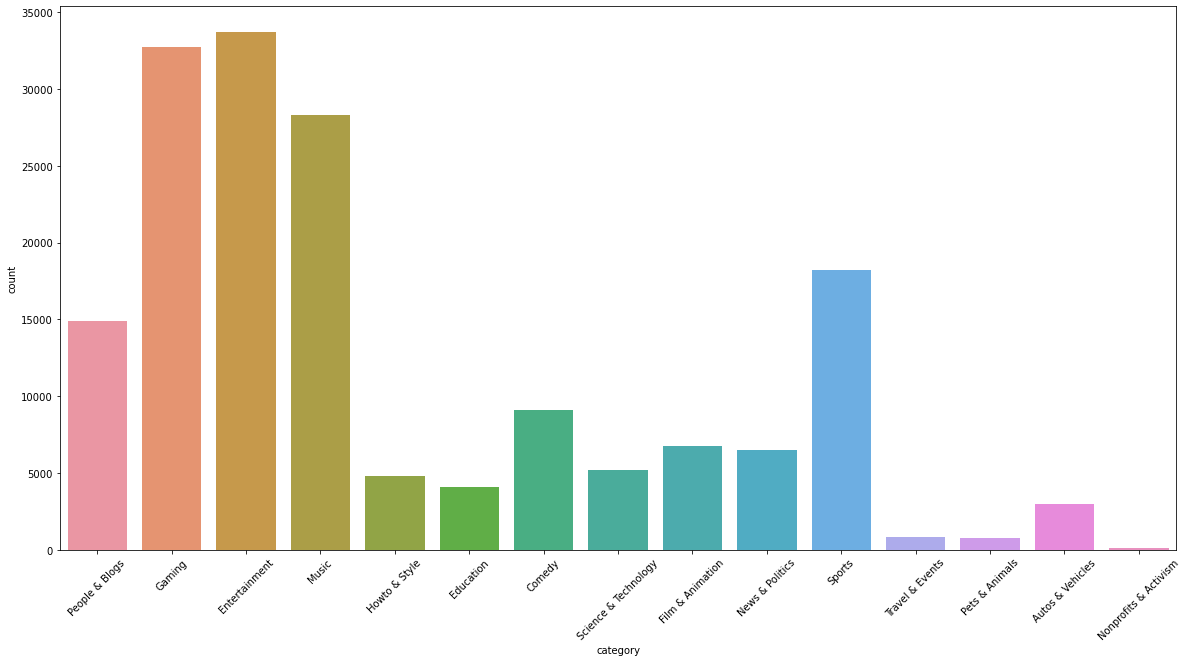

In [25]:
#countplot for category in US
plt.figure(figsize=(20,10))
sns.countplot(x='category', data=US_df)
plt.xticks(rotation=45)
plt.show()

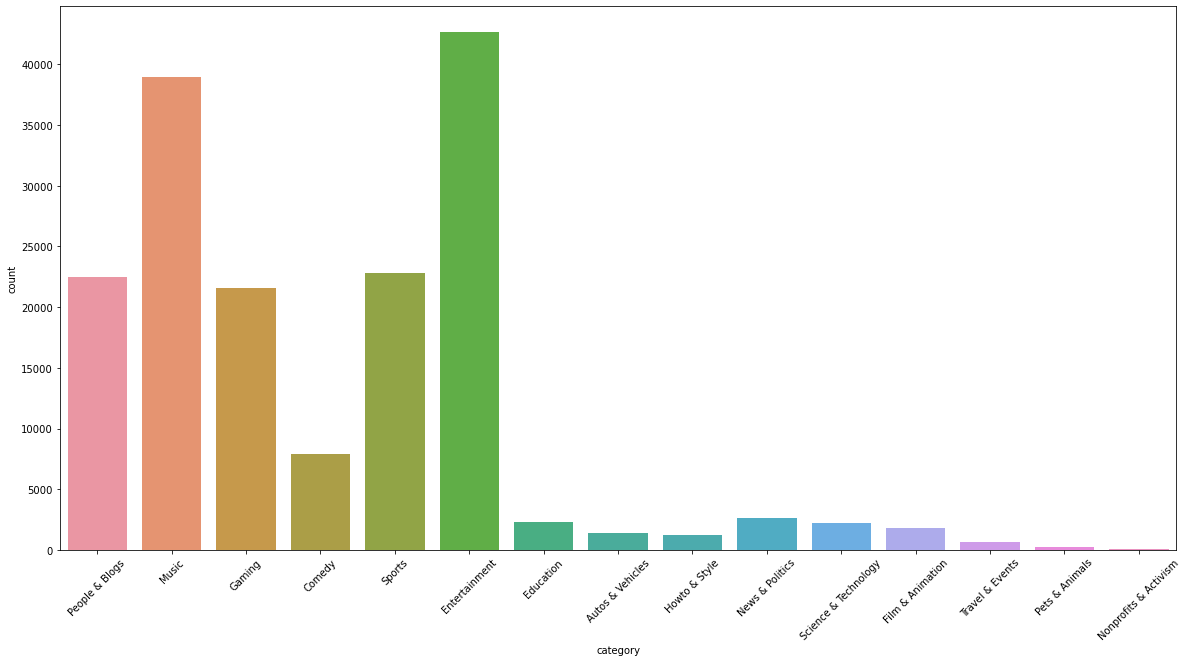

In [26]:
#countplot for category in BR
plt.figure(figsize=(20,10))
sns.countplot(x='category', data=BR_df)
plt.xticks(rotation=45)
plt.show()


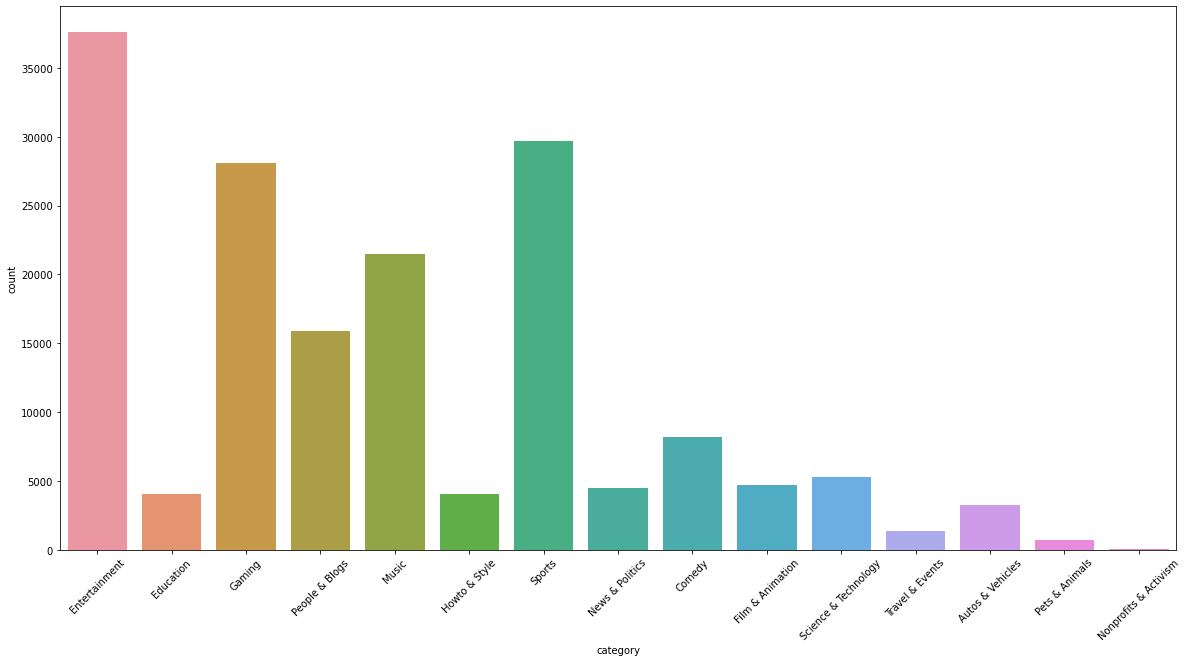

In [27]:
#compare category in US and GB
plt.figure(figsize=(20,10))
sns.countplot(x='category', data=GB_df)
plt.xticks(rotation=45)
plt.show()

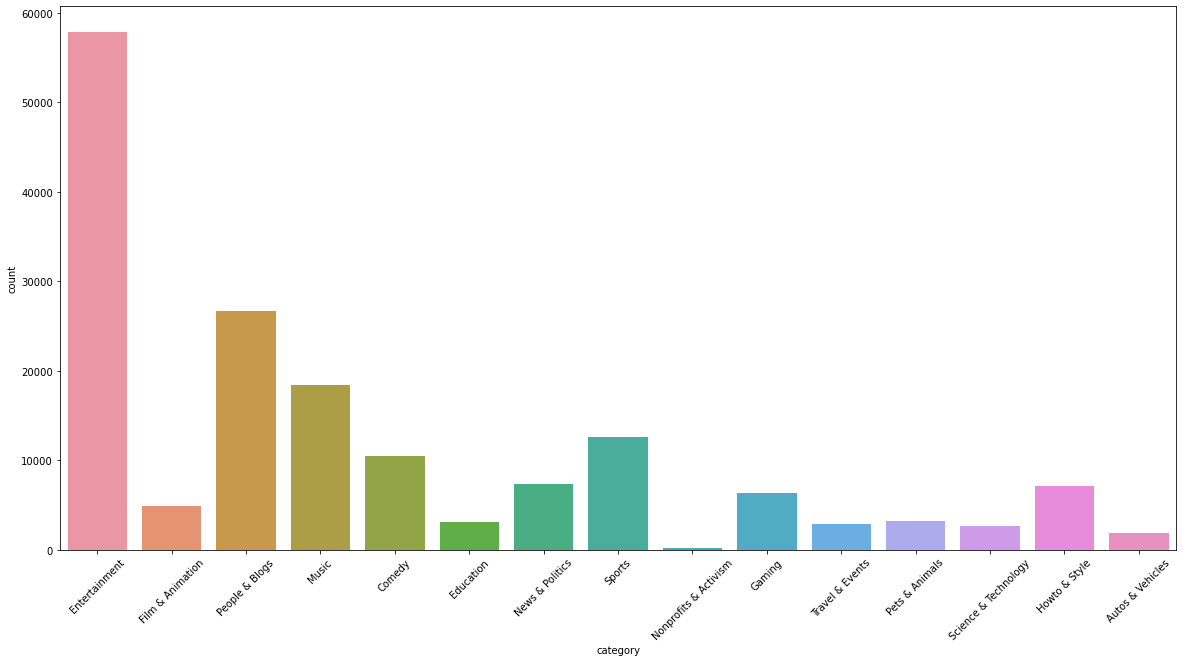

In [28]:
#category in KR
plt.figure(figsize=(20,10))
sns.countplot(x='category', data=KR_df)
plt.xticks(rotation=45)
plt.show()

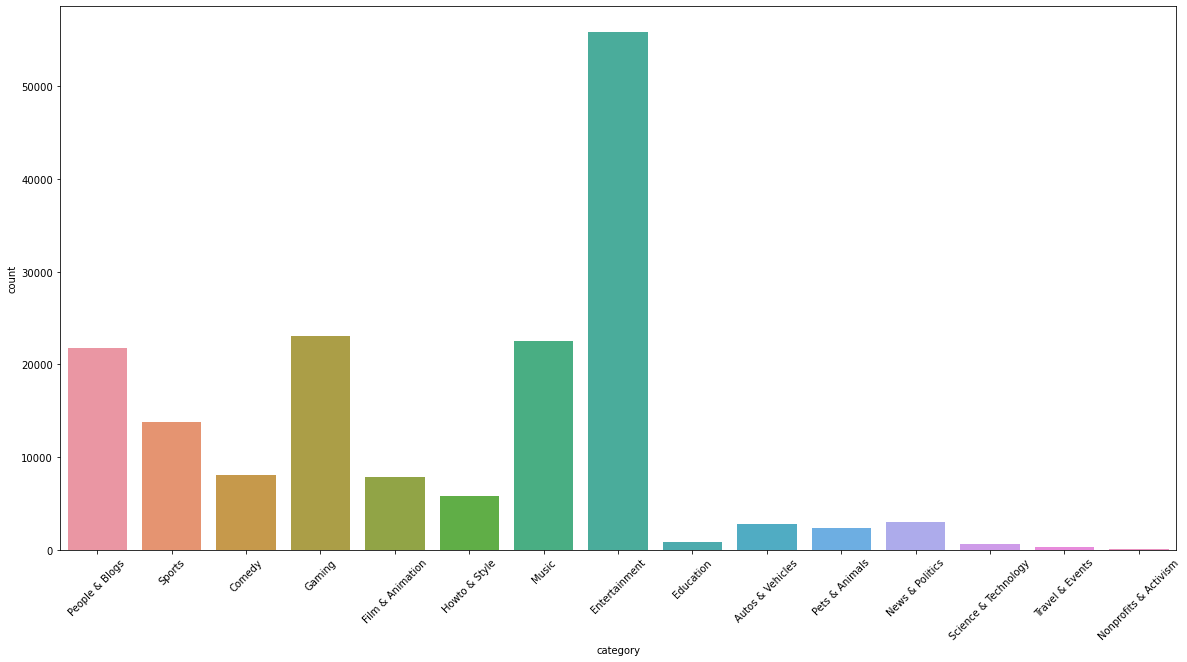

In [29]:
#category in JP
plt.figure(figsize=(20,10))
sns.countplot(x='category', data=JP_df)
plt.xticks(rotation=45)
plt.show()

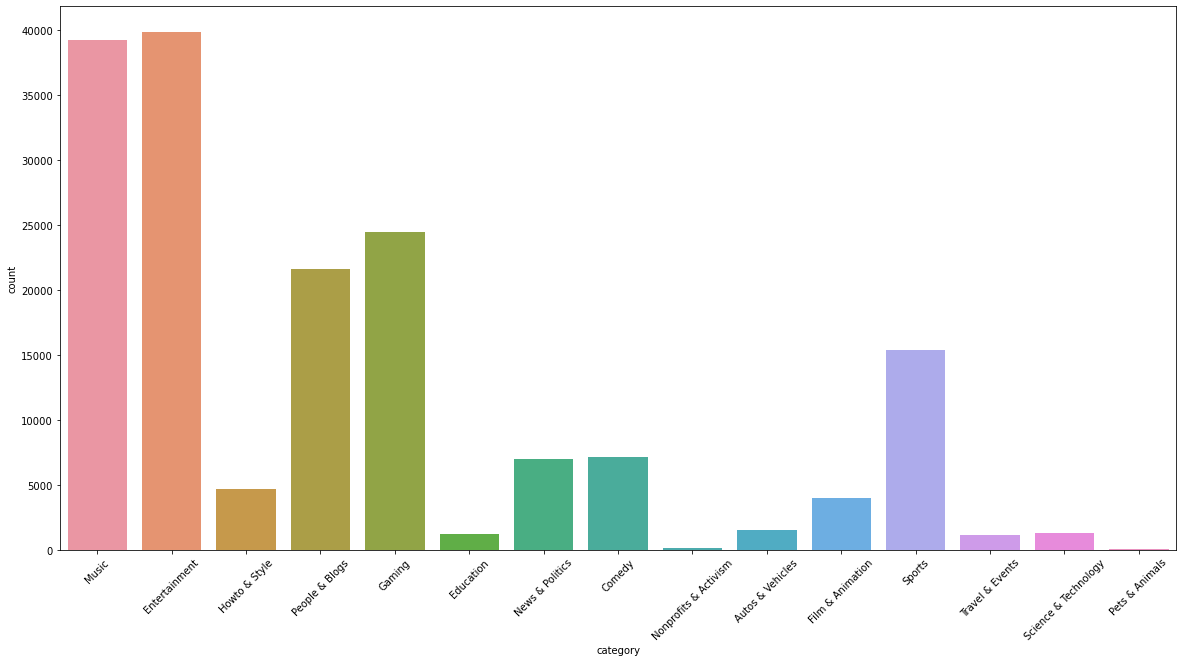

In [30]:
#category in MX
plt.figure(figsize=(20,10))
sns.countplot(x='category', data=MX_df)
plt.xticks(rotation=45)
plt.show()

In [143]:
#US_df gaming video with most views
US_df[US_df['category'] == 'Gaming'][US_df['view_count'] == US_df[US_df['category'] == 'Gaming']['view_count'].max()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\2018356792.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  US_df[US_df['category'] == 'Gaming'][US_df['view_count'] == US_df[US_df['category'] == 'Gaming']['view_count'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
13186,"AMONG US, but with 99 IMPOSTORS",2020-10-09T00:16:14Z,The Pixel Kingdom,20,2020-10-16T00:00:00Z,among us|100 player|99 player|hack|cheat|multi...,73728043,2337792,55198,69154,False,False,Mankind was raised on The Skeld... it was neve...,Gaming


In [134]:
#US_df gaming video with highest likes
US_df[US_df['category'] == 'Gaming'][US_df['likes'] == US_df[US_df['category'] == 'Gaming']['likes'].max()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\3536979643.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  US_df[US_df['category'] == 'Gaming'][US_df['likes'] == US_df[US_df['category'] == 'Gaming']['likes'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
140385,so long nerds,2022-07-01T01:29:02Z,Technoblade,20,2022-07-10T00:00:00Z,Minecraft|Technoblade|Technothepig|Hypixel,68010978,7676226,0,1280276,False,False,--------------------------------BUY MY MERCHAN...,Gaming


In [135]:
#US_df gaming video with lowest likes
US_df[US_df['category'] == 'Gaming'][US_df['likes'] == US_df[US_df['category'] == 'Gaming']['likes'].min()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\480120236.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  US_df[US_df['category'] == 'Gaming'][US_df['likes'] == US_df[US_df['category'] == 'Gaming']['likes'].min()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
8850,FINAL FANTASY XIV - Break the Limit!,2020-09-24T10:20:50Z,FINAL FANTASY XIV,20,2020-09-25T00:00:00Z,FF14|FFXIV|Final Fantasy XIV (Video Game)|ファイナ...,289494,0,0,0,True,True,NaN,Gaming
9069,FINAL FANTASY XIV - Break the Limit!,2020-09-24T10:20:50Z,FINAL FANTASY XIV,20,2020-09-26T00:00:00Z,FF14|FFXIV|Final Fantasy XIV (Video Game)|ファイナ...,376833,0,0,0,True,True,NaN,Gaming
9321,FINAL FANTASY XIV - Break the Limit!,2020-09-24T10:20:50Z,FINAL FANTASY XIV,20,2020-09-27T00:00:00Z,FF14|FFXIV|Final Fantasy XIV (Video Game)|ファイナ...,446288,0,0,0,True,True,NaN,Gaming
9555,FINAL FANTASY XIV - Break the Limit!,2020-09-24T10:20:50Z,FINAL FANTASY XIV,20,2020-09-28T00:00:00Z,FF14|FFXIV|Final Fantasy XIV (Video Game)|ファイナ...,480420,0,0,0,True,True,NaN,Gaming
9820,【Official】Pokémon Special Music Video 「GOTCHA！...,2020-09-29T13:13:35Z,ポケモン公式YouTubeチャンネル,20,2020-09-30T00:00:00Z,ポケモン|ぽけもん|Pokémon|Pokemon|ポケットモンスター|ピカチュウ|イーブイ...,3847311,0,0,18928,False,True,ポケモン ＆ BUMP OF CHICKENスペシャルミュージックビデオ「GOTCHA！」9...,Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168015,DRAGON BALL LEGENDS REVEALS ＆ STUFF LEGENDS FE...,2022-11-24T14:00:10Z,Bandai Namco Entertainment,20,2022-11-26T00:00:00Z,バンダイナムコ|バンナム|876|876TV|BNE|バンダイナムコエンターテインメント|B...,404871,0,0,0,True,True,Reveals & Stuff Legends Festival Editionwill s...,Gaming
168260,DRAGON BALL LEGENDS REVEALS ＆ STUFF LEGENDS FE...,2022-11-24T14:00:10Z,Bandai Namco Entertainment,20,2022-11-27T00:00:00Z,バンダイナムコ|バンナム|876|876TV|BNE|バンダイナムコエンターテインメント|B...,417107,0,0,0,True,True,Reveals & Stuff Legends Festival Editionwill s...,Gaming
168507,DRAGON BALL LEGENDS REVEALS ＆ STUFF LEGENDS FE...,2022-11-24T14:00:10Z,Bandai Namco Entertainment,20,2022-11-28T00:00:00Z,バンダイナムコ|バンナム|876|876TV|BNE|バンダイナムコエンターテインメント|B...,421677,0,0,0,True,True,Reveals & Stuff Legends Festival Editionwill s...,Gaming
168731,DRAGON BALL LEGENDS REVEALS ＆ STUFF LEGENDS FE...,2022-11-24T14:00:10Z,Bandai Namco Entertainment,20,2022-11-29T00:00:00Z,バンダイナムコ|バンナム|876|876TV|BNE|バンダイナムコエンターテインメント|B...,424306,0,0,0,True,True,Reveals & Stuff Legends Festival Editionwill s...,Gaming


In [144]:
#CA_df gaming video with most views
CA_df[CA_df['category'] == 'Gaming'][CA_df['view_count'] == CA_df[CA_df['category'] == 'Gaming']['view_count'].max()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\1534595958.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CA_df[CA_df['category'] == 'Gaming'][CA_df['view_count'] == CA_df[CA_df['category'] == 'Gaming']['view_count'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
49337,Beach Money Ball!!💵🌊💵,2021-04-08T00:45:00Z,Klem Family,20,2021-04-19T00:00:00Z,[None],153462028,3144757,143769,9694,False,False,Beach Money ball!!!Subscribe to watch family f...,Gaming


In [138]:
#CA_df gaming video with highest likes
CA_df[CA_df['category'] == 'Gaming'][CA_df['likes'] == CA_df[CA_df['category'] == 'Gaming']['likes'].max()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\997022419.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CA_df[CA_df['category'] == 'Gaming'][CA_df['likes'] == CA_df[CA_df['category'] == 'Gaming']['likes'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
140132,so long nerds,2022-07-01T01:29:02Z,Technoblade,20,2022-07-09T00:00:00Z,Minecraft|Technoblade|Technothepig|Hypixel,66597605,7582920,0,1262684,False,False,--------------------------------BUY MY MERCHAN...,Gaming


In [139]:
#CA_df gaming video with highest likes
CA_df[CA_df['category'] == 'Gaming'][CA_df['likes'] == CA_df[CA_df['category'] == 'Gaming']['likes'].min()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\1557590334.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CA_df[CA_df['category'] == 'Gaming'][CA_df['likes'] == CA_df[CA_df['category'] == 'Gaming']['likes'].min()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
9059,FINAL FANTASY XIV - Break the Limit!,2020-09-24T10:20:50Z,FINAL FANTASY XIV,20,2020-09-26T00:00:00Z,FF14|FFXIV|Final Fantasy XIV (Video Game)|ファイナ...,376833,0,0,0,True,True,NaN,Gaming
9321,FINAL FANTASY XIV - Break the Limit!,2020-09-24T10:20:50Z,FINAL FANTASY XIV,20,2020-09-27T00:00:00Z,FF14|FFXIV|Final Fantasy XIV (Video Game)|ファイナ...,446288,0,0,0,True,True,NaN,Gaming
9563,FINAL FANTASY XIV - Break the Limit!,2020-09-24T10:20:50Z,FINAL FANTASY XIV,20,2020-09-28T00:00:00Z,FF14|FFXIV|Final Fantasy XIV (Video Game)|ファイナ...,480420,0,0,0,True,True,NaN,Gaming
20641,"T1, An Update, and My Future Plans",2020-11-24T08:17:00Z,LS,20,2020-11-25T00:00:00Z,T1|T1LoL|LS|LSXYZ9|Korea|South Korea|LCK|Analy...,203276,0,0,2126,False,True,I'll be elaborating further on certain topics ...,Gaming
20880,"T1, An Update, and My Future Plans",2020-11-24T08:17:00Z,LS,20,2020-11-26T00:00:00Z,T1|T1LoL|LS|LSXYZ9|Korea|South Korea|LCK|Analy...,223226,0,0,2255,False,True,I'll be elaborating further on certain topics ...,Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167751,DRAGON BALL LEGENDS REVEALS ＆ STUFF LEGENDS FE...,2022-11-24T14:00:10Z,Bandai Namco Entertainment,20,2022-11-25T00:00:00Z,バンダイナムコ|バンナム|876|876TV|BNE|バンダイナムコエンターテインメント|B...,362789,0,0,0,True,True,Reveals & Stuff Legends Festival Editionwill s...,Gaming
167973,DRAGON BALL LEGENDS REVEALS ＆ STUFF LEGENDS FE...,2022-11-24T14:00:10Z,Bandai Namco Entertainment,20,2022-11-26T00:00:00Z,バンダイナムコ|バンナム|876|876TV|BNE|バンダイナムコエンターテインメント|B...,404871,0,0,0,True,True,Reveals & Stuff Legends Festival Editionwill s...,Gaming
168226,DRAGON BALL LEGENDS REVEALS ＆ STUFF LEGENDS FE...,2022-11-24T14:00:10Z,Bandai Namco Entertainment,20,2022-11-27T00:00:00Z,バンダイナムコ|バンナム|876|876TV|BNE|バンダイナムコエンターテインメント|B...,417113,0,0,0,True,True,Reveals & Stuff Legends Festival Editionwill s...,Gaming
168473,DRAGON BALL LEGENDS REVEALS ＆ STUFF LEGENDS FE...,2022-11-24T14:00:10Z,Bandai Namco Entertainment,20,2022-11-28T00:00:00Z,バンダイナムコ|バンナム|876|876TV|BNE|バンダイナムコエンターテインメント|B...,421677,0,0,0,True,True,Reveals & Stuff Legends Festival Editionwill s...,Gaming


In [145]:
#KR_df gaming video with most views
KR_df[KR_df['category'] == 'Gaming'][KR_df['view_count'] == KR_df[KR_df['category'] == 'Gaming']['view_count'].max()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\2757566623.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  KR_df[KR_df['category'] == 'Gaming'][KR_df['view_count'] == KR_df[KR_df['category'] == 'Gaming']['view_count'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
102737,The Call | Season 2022 Cinematic - League of L...,2022-01-07T15:06:43Z,League of Legends,20,2022-01-18T00:00:00Z,Riot Games|Riot|League of Legends|League|LoL|M...,90978675,628274,0,27684,False,False,For the fallen. For the deserted. For the down...,Gaming


In [140]:
#KR_df gaming video with highest likes
KR_df[KR_df['category'] == 'Gaming'][KR_df['likes'] == KR_df[KR_df['category'] == 'Gaming']['likes'].max()]

#The result is actually a music video published by Riot Games

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\2977132281.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  KR_df[KR_df['category'] == 'Gaming'][KR_df['likes'] == KR_df[KR_df['category'] == 'Gaming']['likes'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
14551,"K/DA - MORE ft. Madison Beer, (G)I-DLE, Lexie ...",2020-10-28T14:00:09Z,League of Legends,20,2020-11-08T00:00:00Z,Riot Games|Riot|League of Legends|League|LoL|M...,31464254,1309731,73357,130947,False,False,"Ascend the throne. K/DA is back with “MORE,” f...",Gaming


In [146]:
#JP_df gaming video with most views
JP_df[JP_df['category'] == 'Gaming'][JP_df['view_count'] == JP_df[JP_df['category'] == 'Gaming']['view_count'].max()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\3424792781.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  JP_df[JP_df['category'] == 'Gaming'][JP_df['view_count'] == JP_df[JP_df['category'] == 'Gaming']['view_count'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
6785,Brawl Stars: Brawl Talk - Welcome to Starr Par...,2020-09-07T08:00:10Z,Brawl Stars,20,2020-09-14T00:00:00Z,brawl stars|mobile game|mobile strategy game|m...,32114735,824755,28567,78320,False,False,Download NOW!! ►► https://supr.cl/playbrawlBe ...,Gaming


In [141]:
#JP_df gaming video with highest likes
JP_df[JP_df['category'] == 'Gaming'][JP_df['likes'] == JP_df[JP_df['category'] == 'Gaming']['likes'].max()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\1020676060.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  JP_df[JP_df['category'] == 'Gaming'][JP_df['likes'] == JP_df[JP_df['category'] == 'Gaming']['likes'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
16561,"K/DA - MORE ft. Madison Beer, (G)I-DLE, Lexie ...",2020-10-28T14:00:09Z,League of Legends,20,2020-11-03T00:00:00Z,Riot Games|Riot|League of Legends|League|LoL|M...,23700450,1149327,64546,120864,False,False,"Ascend the throne. K/DA is back with “MORE,” f...",Gaming


In [147]:
#GB_df gaming video with most views
GB_df[GB_df['category'] == 'Gaming'][GB_df['view_count'] == GB_df[GB_df['category'] == 'Gaming']['view_count'].max()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\4066207570.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  GB_df[GB_df['category'] == 'Gaming'][GB_df['view_count'] == GB_df[GB_df['category'] == 'Gaming']['view_count'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
55991,Money Plinko Challenge! 💰 #shorts,2021-05-14T22:57:41Z,AnthonySenpai,20,2021-05-22T00:00:00Z,[None],72681293,1935280,70167,4646,False,False,NaN,Gaming


In [142]:
#GB_df gaming video with highest likes
GB_df[GB_df['category'] == 'Gaming'][GB_df['likes'] == GB_df[GB_df['category'] == 'Gaming']['likes'].max()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\762312974.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  GB_df[GB_df['category'] == 'Gaming'][GB_df['likes'] == GB_df[GB_df['category'] == 'Gaming']['likes'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
140379,so long nerds,2022-07-01T01:29:02Z,Technoblade,20,2022-07-10T00:00:00Z,Minecraft|Technoblade|Technothepig|Hypixel,68010978,7676226,0,1280276,False,False,--------------------------------BUY MY MERCHAN...,Gaming


In [151]:
#FR_df gaming video with most views
FR_df[FR_df['category'] == 'Gaming'][FR_df['view_count'] == FR_df[FR_df['category'] == 'Gaming']['view_count'].max()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\1664916811.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FR_df[FR_df['category'] == 'Gaming'][FR_df['view_count'] == FR_df[FR_df['category'] == 'Gaming']['view_count'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
144745,CLASHIVERSARY is Almost Here! RIP Barbarian? 🙏,2022-07-26T13:59:48Z,Clash of Clans,20,2022-08-01T00:00:00Z,clash of clans|COC|Clash of Clans Gameplay|Cla...,39443504,279182,0,9089,False,False,Break out the disco balls and fire up the Infe...,Gaming


In [152]:
#FR_df gaming video with highest likes
FR_df[FR_df['category'] == 'Gaming'][FR_df['likes'] == FR_df[FR_df['category'] == 'Gaming']['likes'].max()]

C:\Users\agpju\AppData\Local\Temp\ipykernel_131452\3247761686.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FR_df[FR_df['category'] == 'Gaming'][FR_df['likes'] == FR_df[FR_df['category'] == 'Gaming']['likes'].max()]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
16596,"K/DA - MORE ft. Madison Beer, (G)I-DLE, Lexie ...",2020-10-28T14:00:09Z,League of Legends,20,2020-11-03T00:00:00Z,Riot Games|Riot|League of Legends|League|LoL|M...,23700450,1149321,64546,120863,False,False,"Ascend the throne. K/DA is back with “MORE,” f...",Gaming


In [136]:
#video of highest dislikes in CA
CA_df[CA_df['dislikes'] == CA_df['dislikes'].max()]

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
4981,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,BLACKPINK,10,2020-09-05T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795687,879357,2736022,False,False,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...,Music


In [148]:
#video of highest dislikes in CA
CA_df[CA_df['dislikes'] == CA_df['dislikes'].head().max()]

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
0,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,False,False,CLASH official music video performed by DILJIT...,Music
14003,GIANT Pumpkin Carving Contest,2020-10-19T22:00:05Z,Dude Perfect,17,2020-10-21T00:00:00Z,dude perfect|dude perfect stereotypes|dude per...,7846306,359477,6180,18675,False,False,"Hide and seek in a HUGE store, carving massive...",Sports
16908,BEST FRIENDS BUYING EACH OTHER COSTUMES ft. Ja...,2020-10-30T19:01:15Z,LARRAY,22,2020-11-05T00:00:00Z,LARRAY|JAMES CHARLES|NOAH BECK|CHASE HUDSON|li...,8117689,579916,6180,26521,False,False,I love being the duff of the friend group JAME...,People & Blogs
22861,Swatching EVERY Liquid Lipstick I’ve EVER Made,2020-12-04T18:00:15Z,jeffreestar,26,2020-12-07T00:00:00Z,jeffree star|jeffree star cosmetics|jeffree st...,1585215,66345,6180,9853,False,False,"Hey everyone, welcome BACK to my channel!! I c...",Howto & Style
25463,24kGoldn - Coco ft. DaBaby (Dir. by @_ColeBenn...,2020-12-16T23:15:09Z,Lyrical Lemonade,24,2020-12-20T00:00:00Z,Coco|Golden|24k|24karot|24kGoldn|DaBaby|Baby J...,3071268,231760,6180,17139,False,False,Lyrical Lemonade Presents24kGoldn - Coco (feat...,Entertainment


In [31]:
MX_df

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
0,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113999,4380,5620,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...,Music
1,Belinda y Christian Nodal cantan De los besos ...,2020-08-11T18:03:06Z,TV Azteca,24,2020-08-12T00:00:00Z,tv azteca|videos de tv azteca|azteca uno|en su...,402507,8102,831,803,False,False,Encendieron el escenario de La Voz. TV AztecaT...,Entertainment
2,¿QUIÉN HACE LOS MEJORES NUGGETS? | EL GUZII,2020-08-11T19:57:02Z,El Guzii,26,2020-08-12T00:00:00Z,El Guzii|Guzzi|Guzy|Guzii Style|Recetas Divert...,735044,62188,1053,4100,False,False,Si tienes 10 kg de sobre peso tal vez te haz p...,Howto & Style
3,Martha Figueroa se disculpa públicamente con N...,2020-08-11T15:57:47Z,Hoy,24,2020-08-12T00:00:00Z,Televisa|Televisa espectaculos|programa hoy te...,521751,4680,3129,2285,False,False,Mira aquí el contenido exclusivo que tenemos p...,Entertainment
4,MAQUILLAJE PARA KIMBERLY LOAIZA✨ RESISTENTE AL...,2020-08-11T21:55:08Z,Victor Guadarrama,26,2020-08-12T00:00:00Z,MAQUILLAJE|CELEBS|ARTE|MAKEUP|PESTAÑAS|KIMBERL...,168118,24551,537,782,False,False,No olvides suscribirte y activar la campanita ...,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168794,Catar 2022: los 89 datos más inesperados,2022-11-19T22:00:26Z,Un Mundo Inmenso,19,2022-11-30T00:00:00Z,qatar|mundial|fútbol|fifa|messi|argentina,688732,39708,0,1740,False,False,Termina la previa y ya se viene la gran cita f...,Travel & Events
168795,¡LE FALTO el RESPETO a BARBIE y DONATO ME TERM...,2022-11-19T01:24:36Z,Yair17,20,2022-11-30T00:00:00Z,Yair17,661976,53885,0,1148,False,False,"¡Hola, cracks! En el video de hoy Barbie y yo ...",Gaming
168796,"Tengo cáncer otra vez, ahora pelearé por mis b...",2022-11-19T20:00:10Z,Reymarqueza,22,2022-11-30T00:00:00Z,[None],392708,15211,0,2692,False,False,En este video abro mi corazón de nuevo a usted...,People & Blogs
168797,"Jaziel Avilez, Codiciado, Peso Pluma - Ando En...",2022-11-18T05:00:07Z,Golden Ink Entertainment,10,2022-11-30T00:00:00Z,Golden Ink|jaziel avilez|fuga|l prince|jaziel|...,1469426,41758,0,623,False,False,Escucha #AndoEnfocado en tu plataforma favorit...,Music


In [32]:
US_df.isna().sum()

title                   0
publishedAt             0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
comments_disabled       0
ratings_disabled        0
description          3883
category                0
dtype: int64

In [33]:
JP_df.isna().sum()

title                   0
publishedAt             0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
comments_disabled       0
ratings_disabled        0
description          2487
category                0
dtype: int64

In [34]:
US_df.shape

(168990, 14)

In [35]:
for cols in US_df.columns:
    print(cols, US_df[cols].dtype)

title object
publishedAt object
channelTitle object
categoryId int64
trending_date object
tags object
view_count int64
likes int64
dislikes int64
comment_count int64
comments_disabled bool
ratings_disabled bool
description object
category object


<AxesSubplot:>

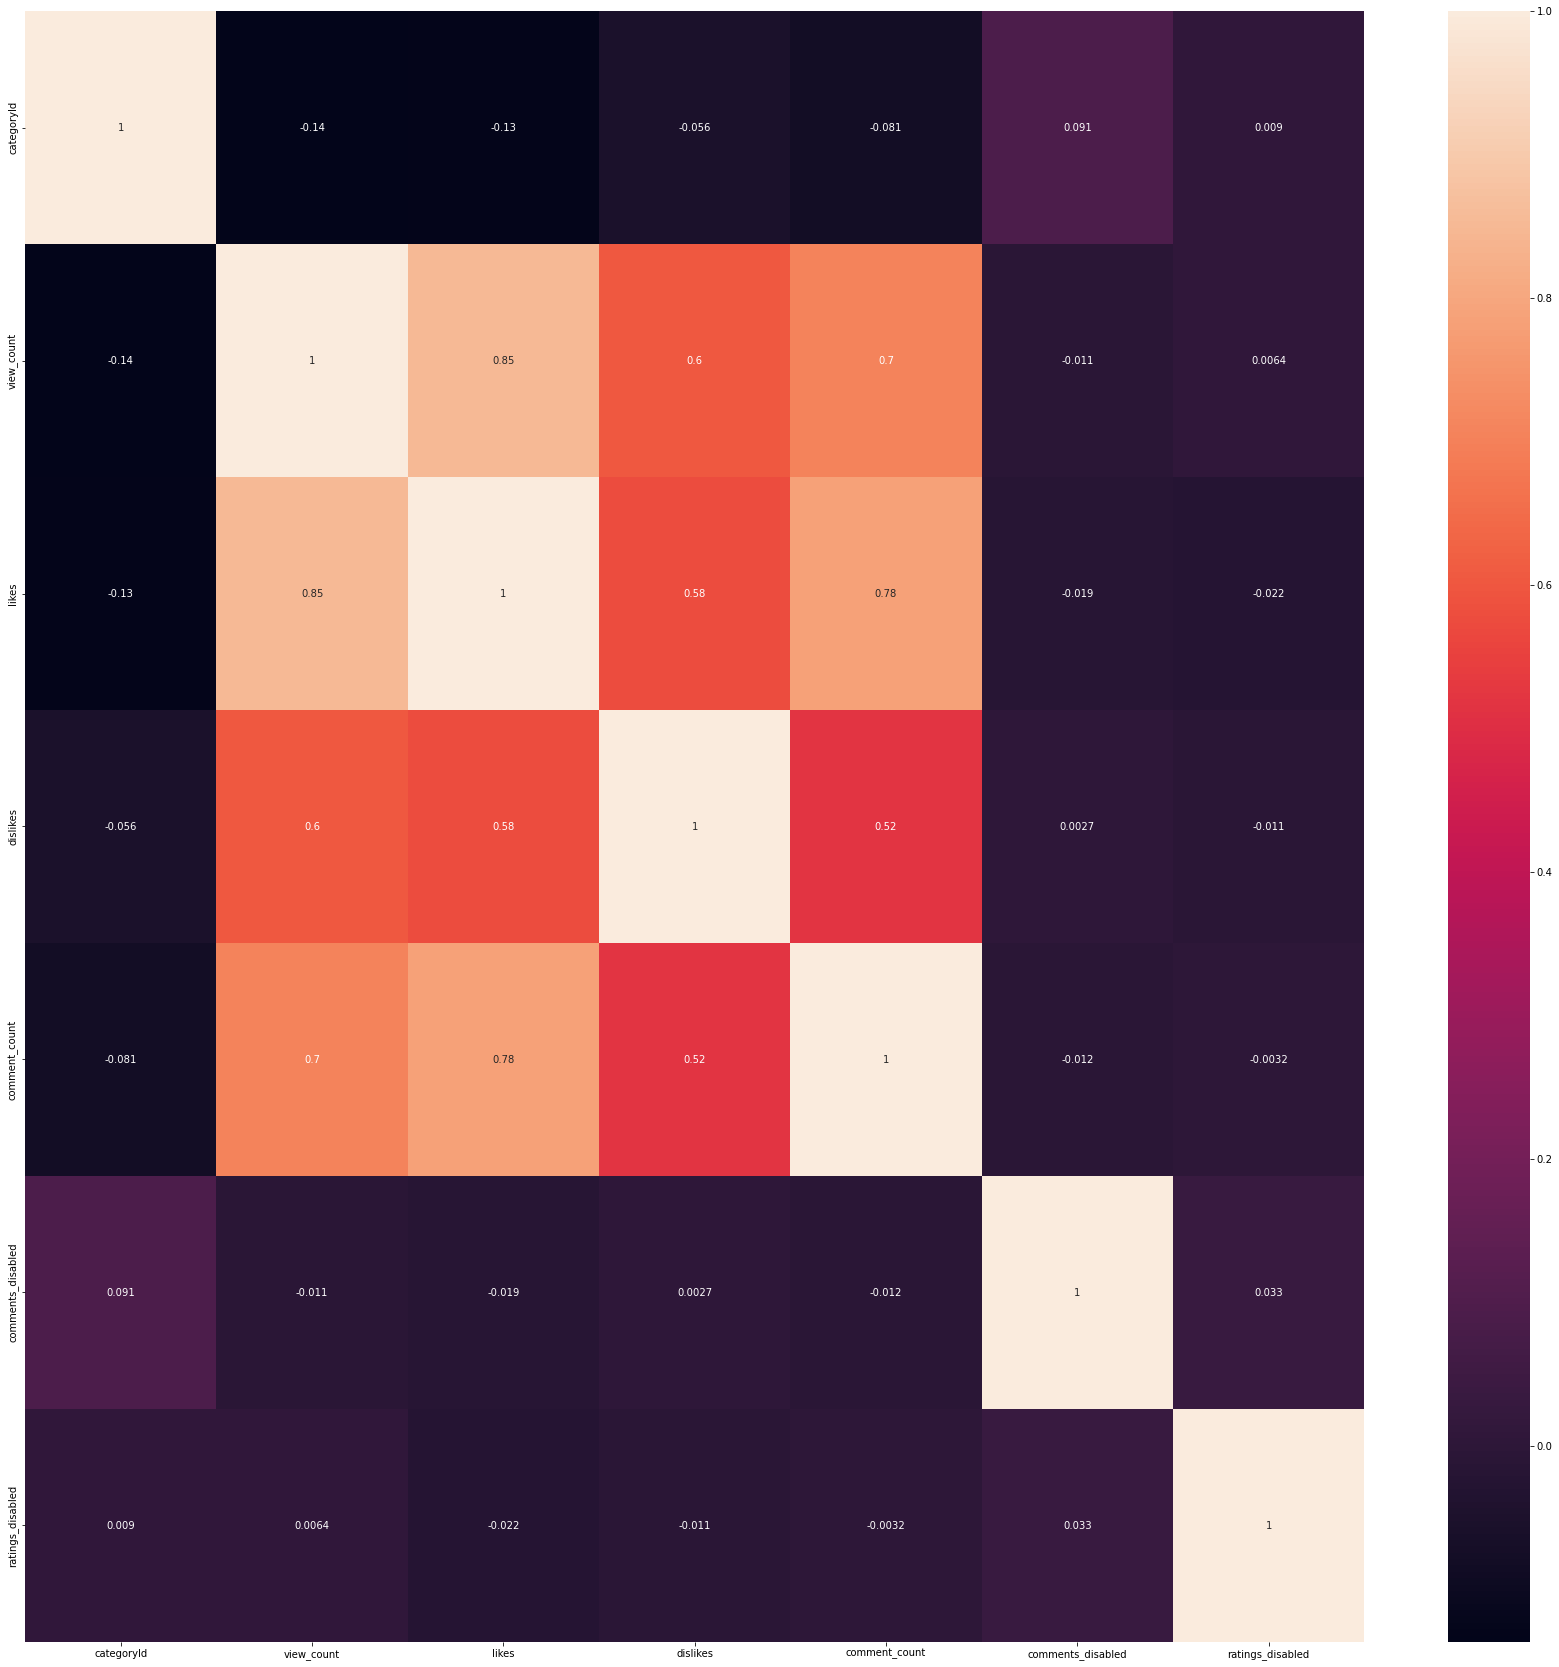

In [36]:
#Correlation heatmap for BR
corr = BR_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

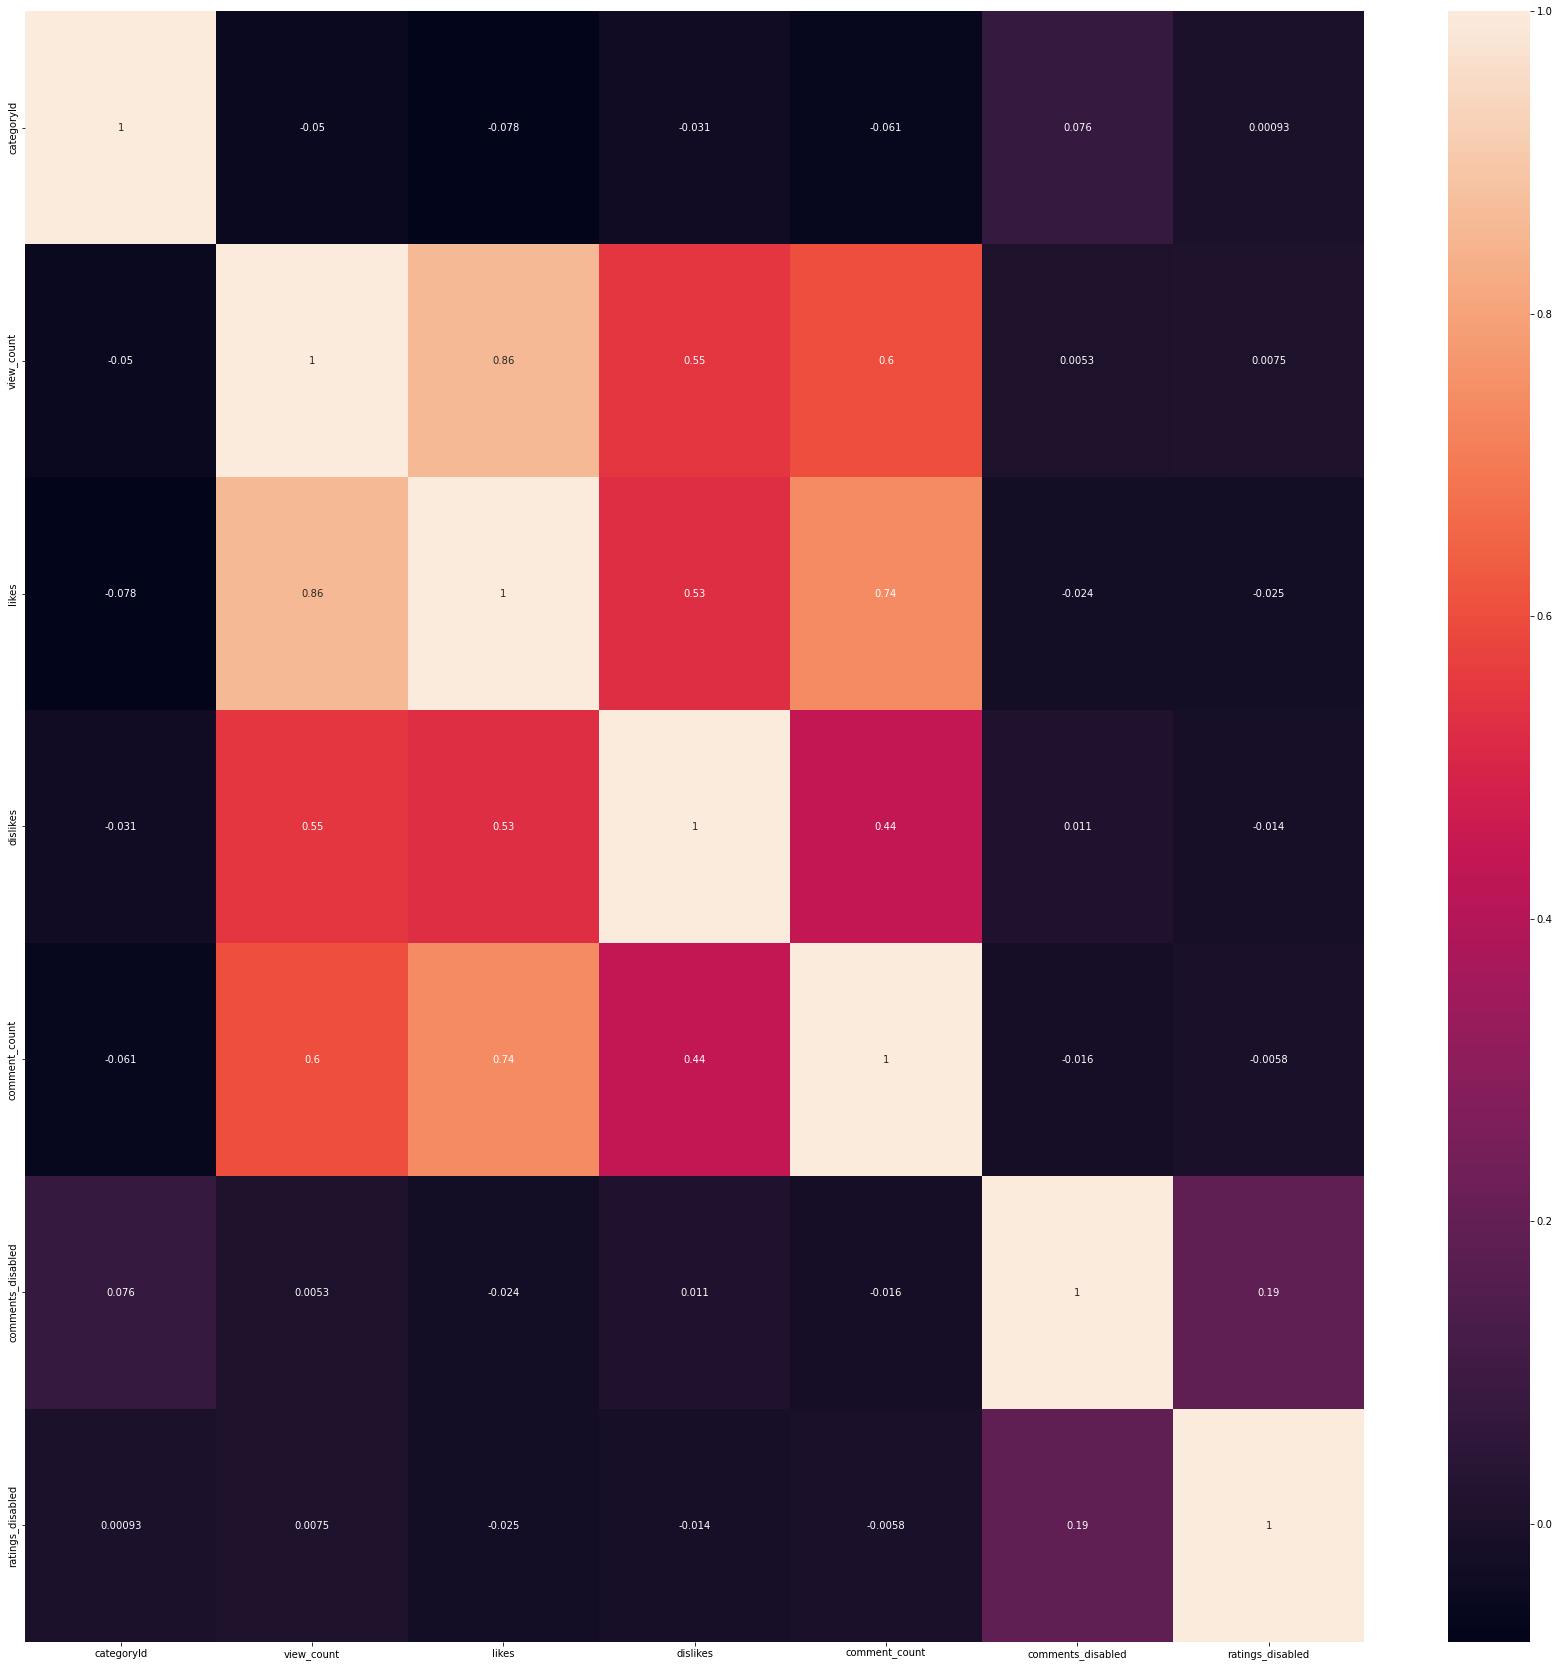

In [37]:
#Correlation heatmap for US
corr = US_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

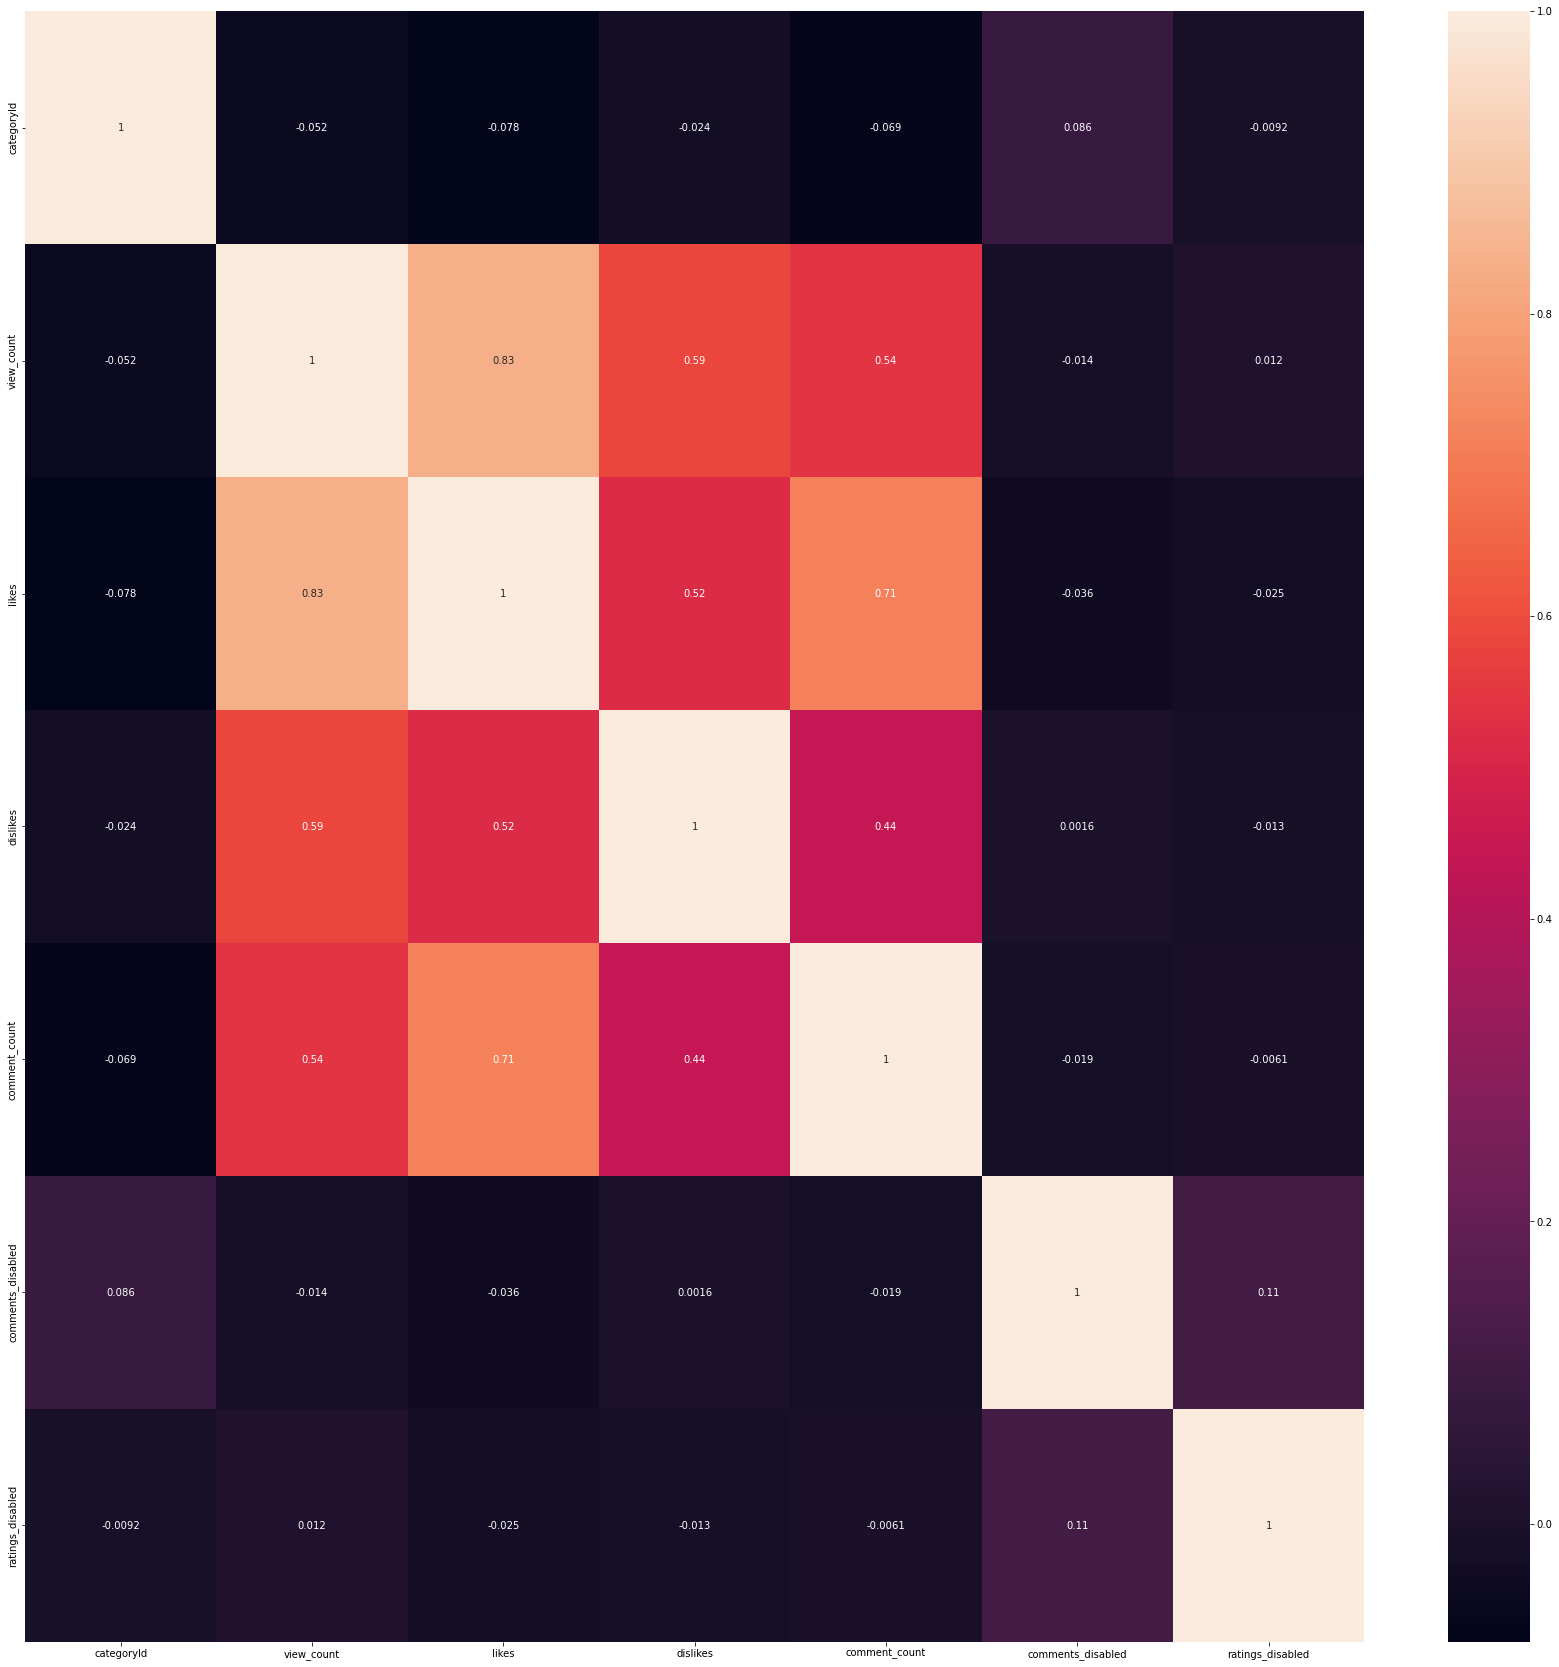

In [38]:
#Correlation heatmap for GB
corr = GB_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

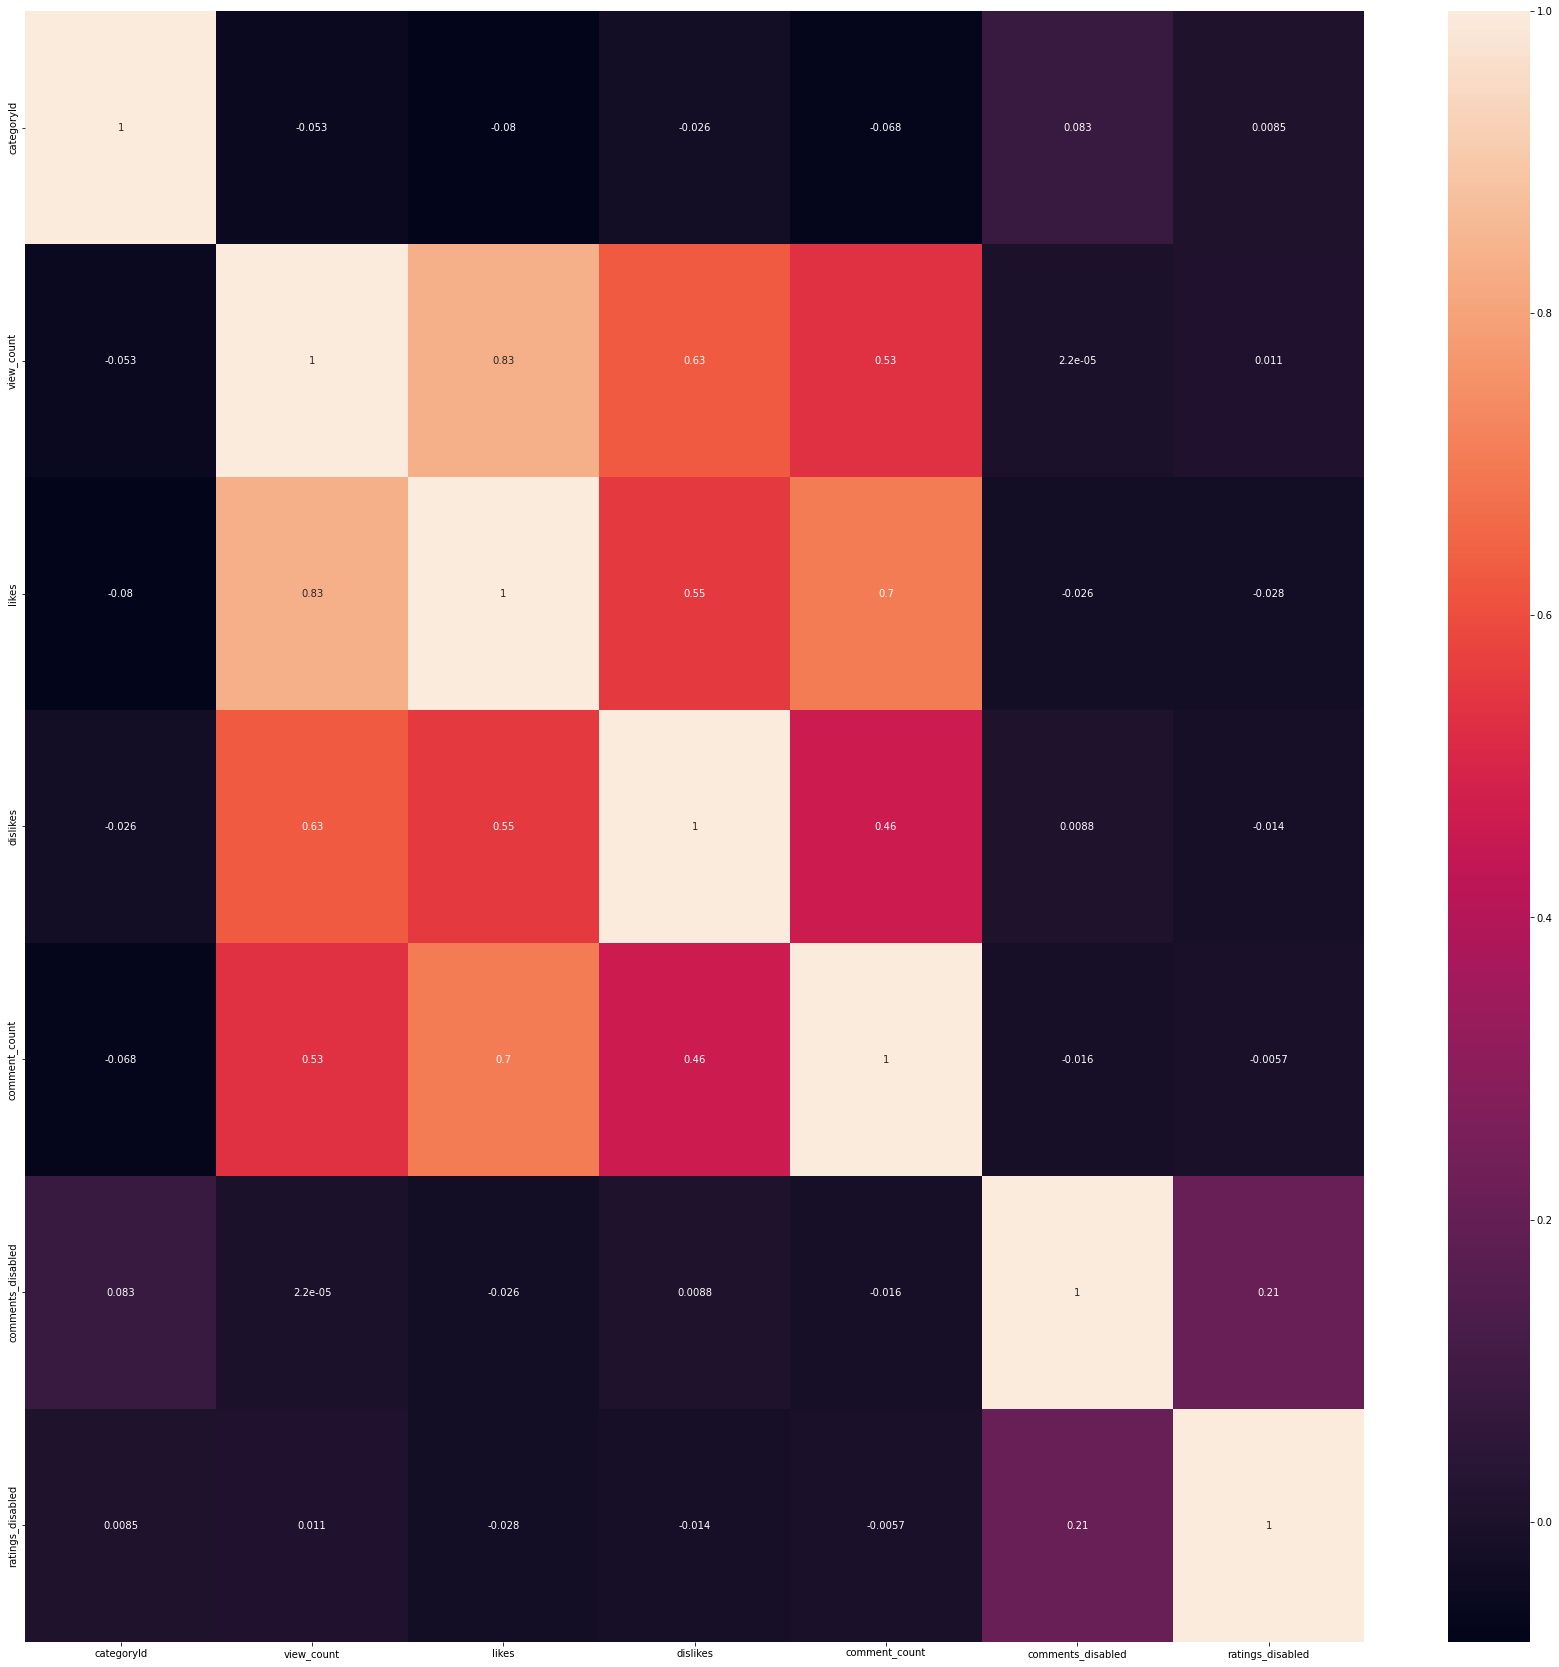

In [39]:
#Correlation heatmap for CA
corr = CA_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

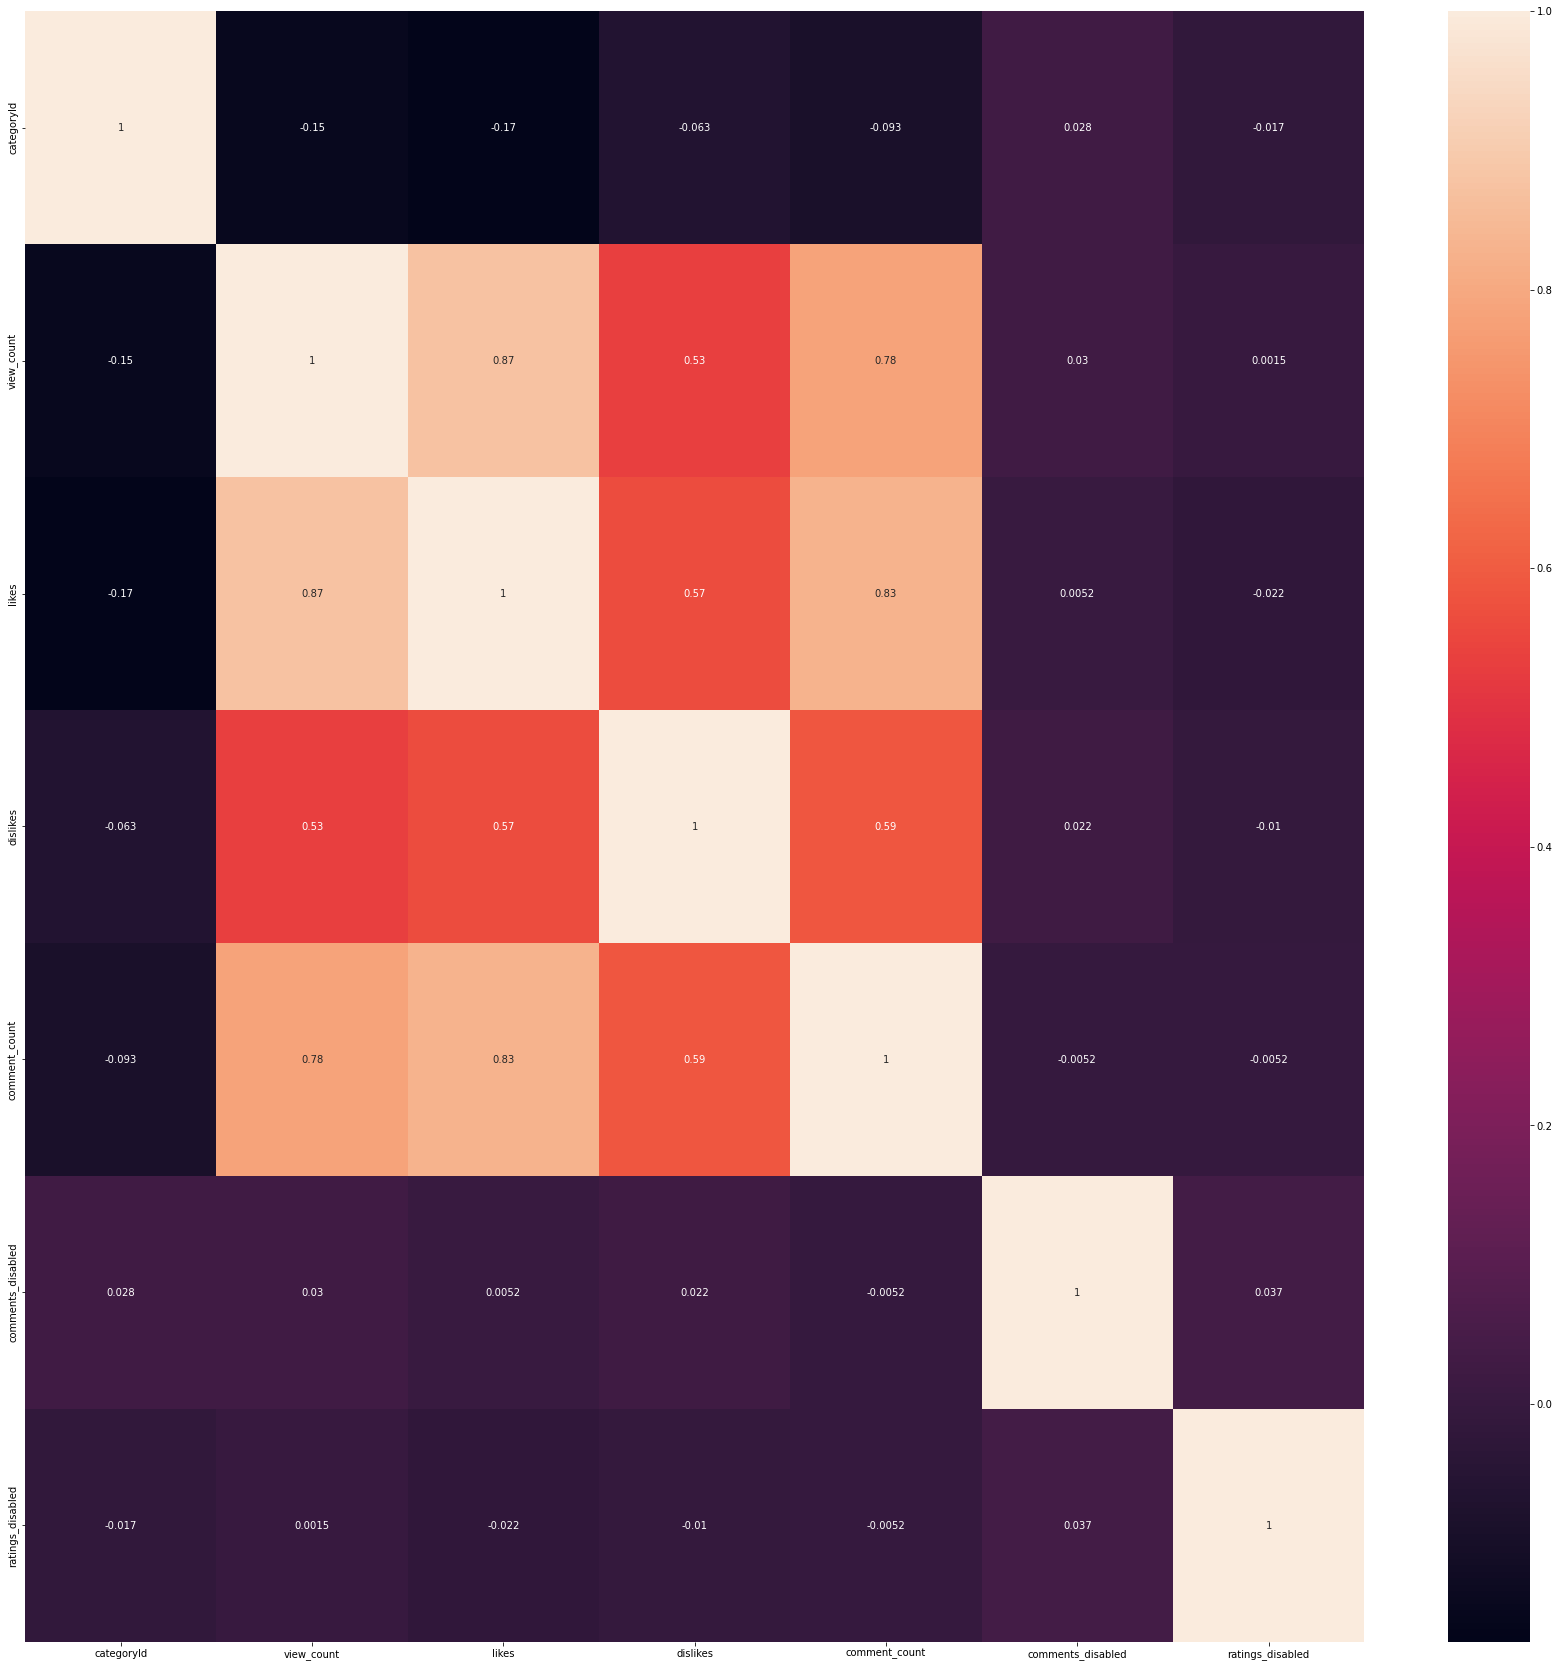

In [40]:
#Correlation heatmap for KR
corr = KR_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

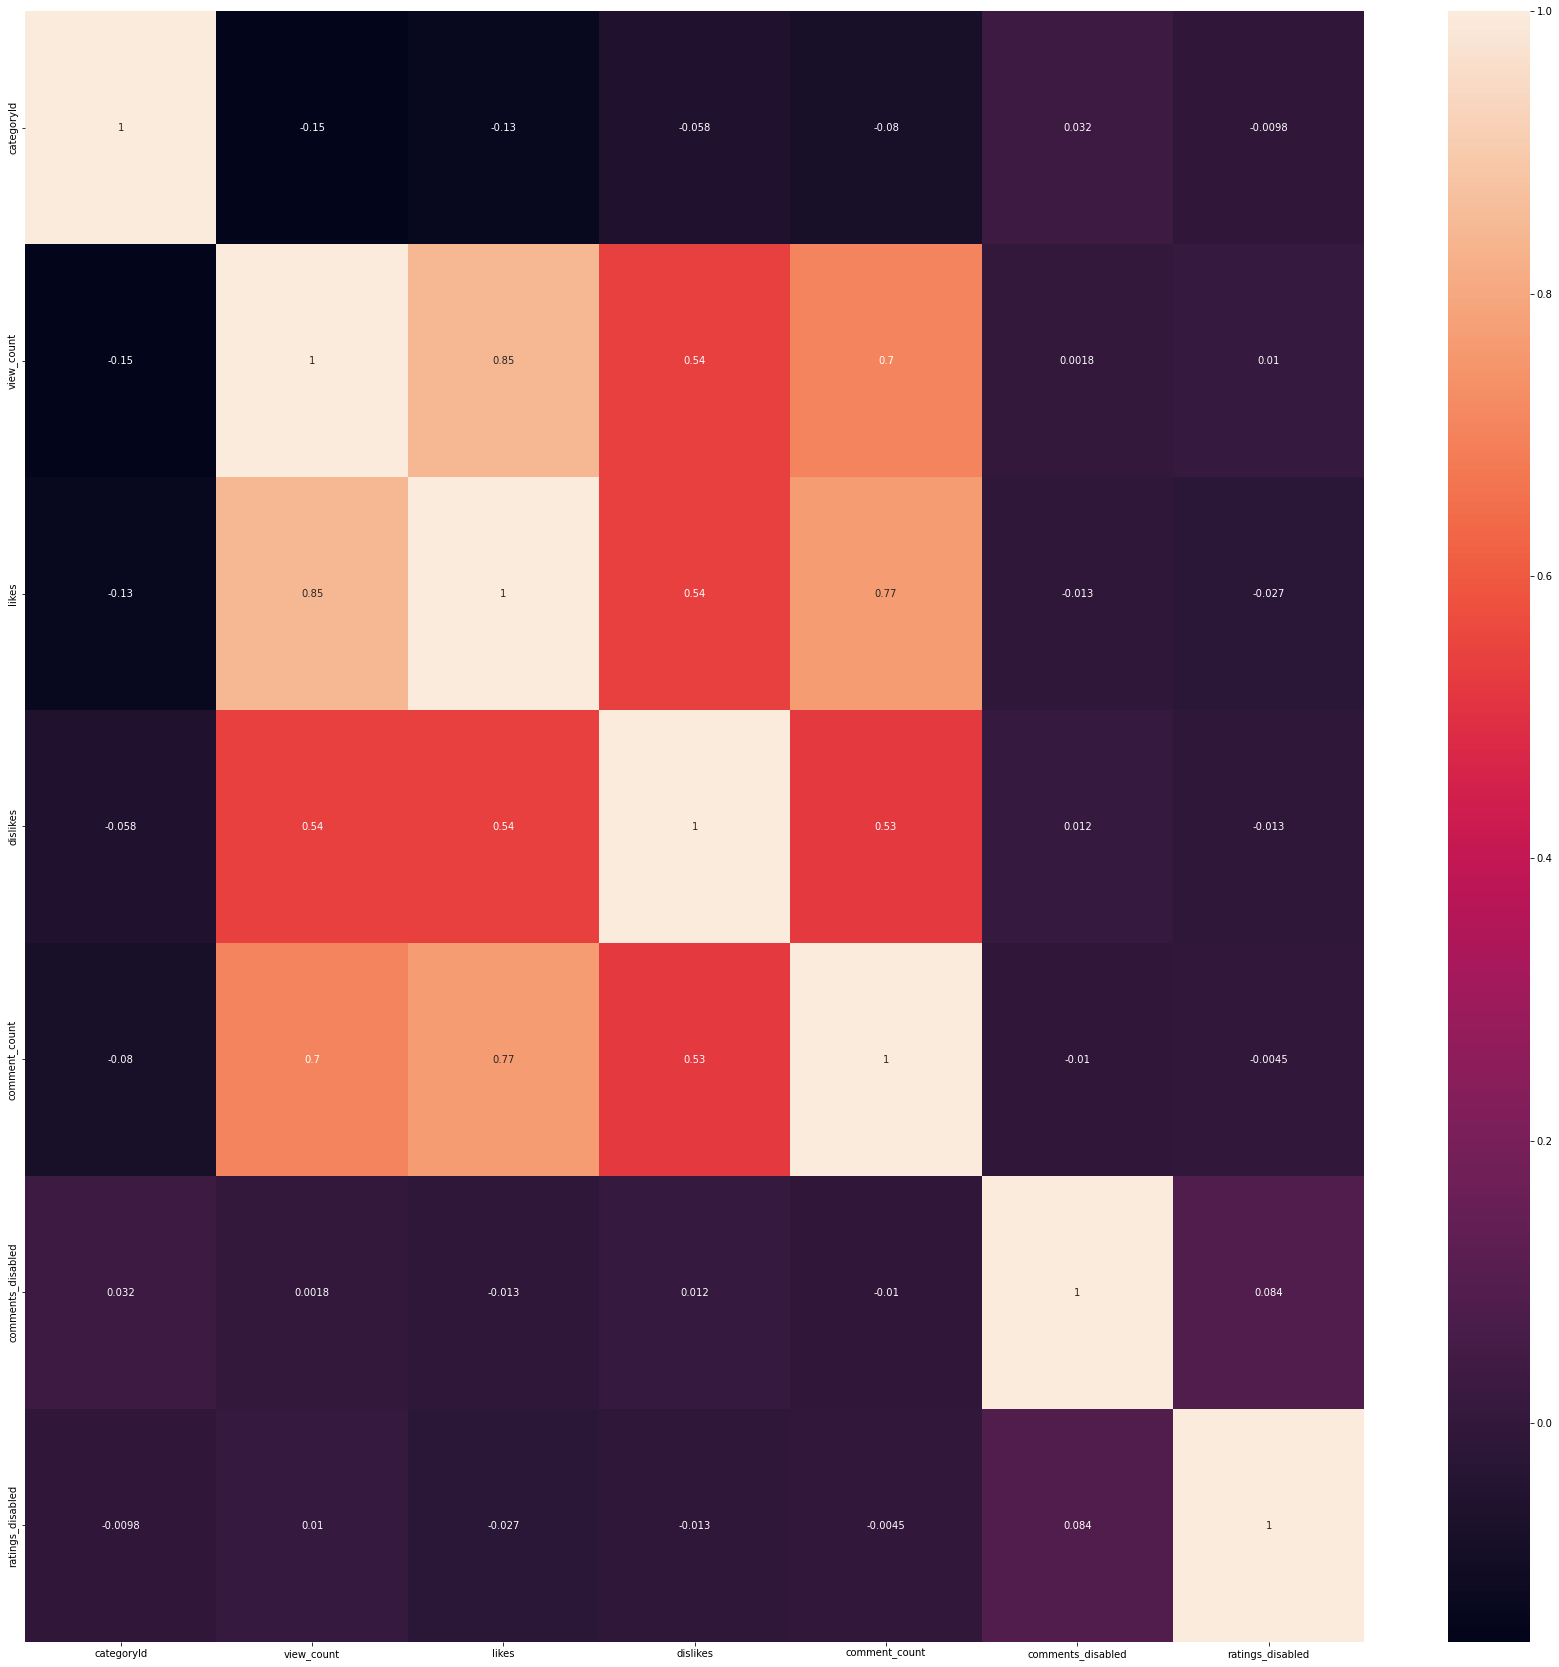

In [41]:
#Correlation heatmap for MX
corr = MX_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

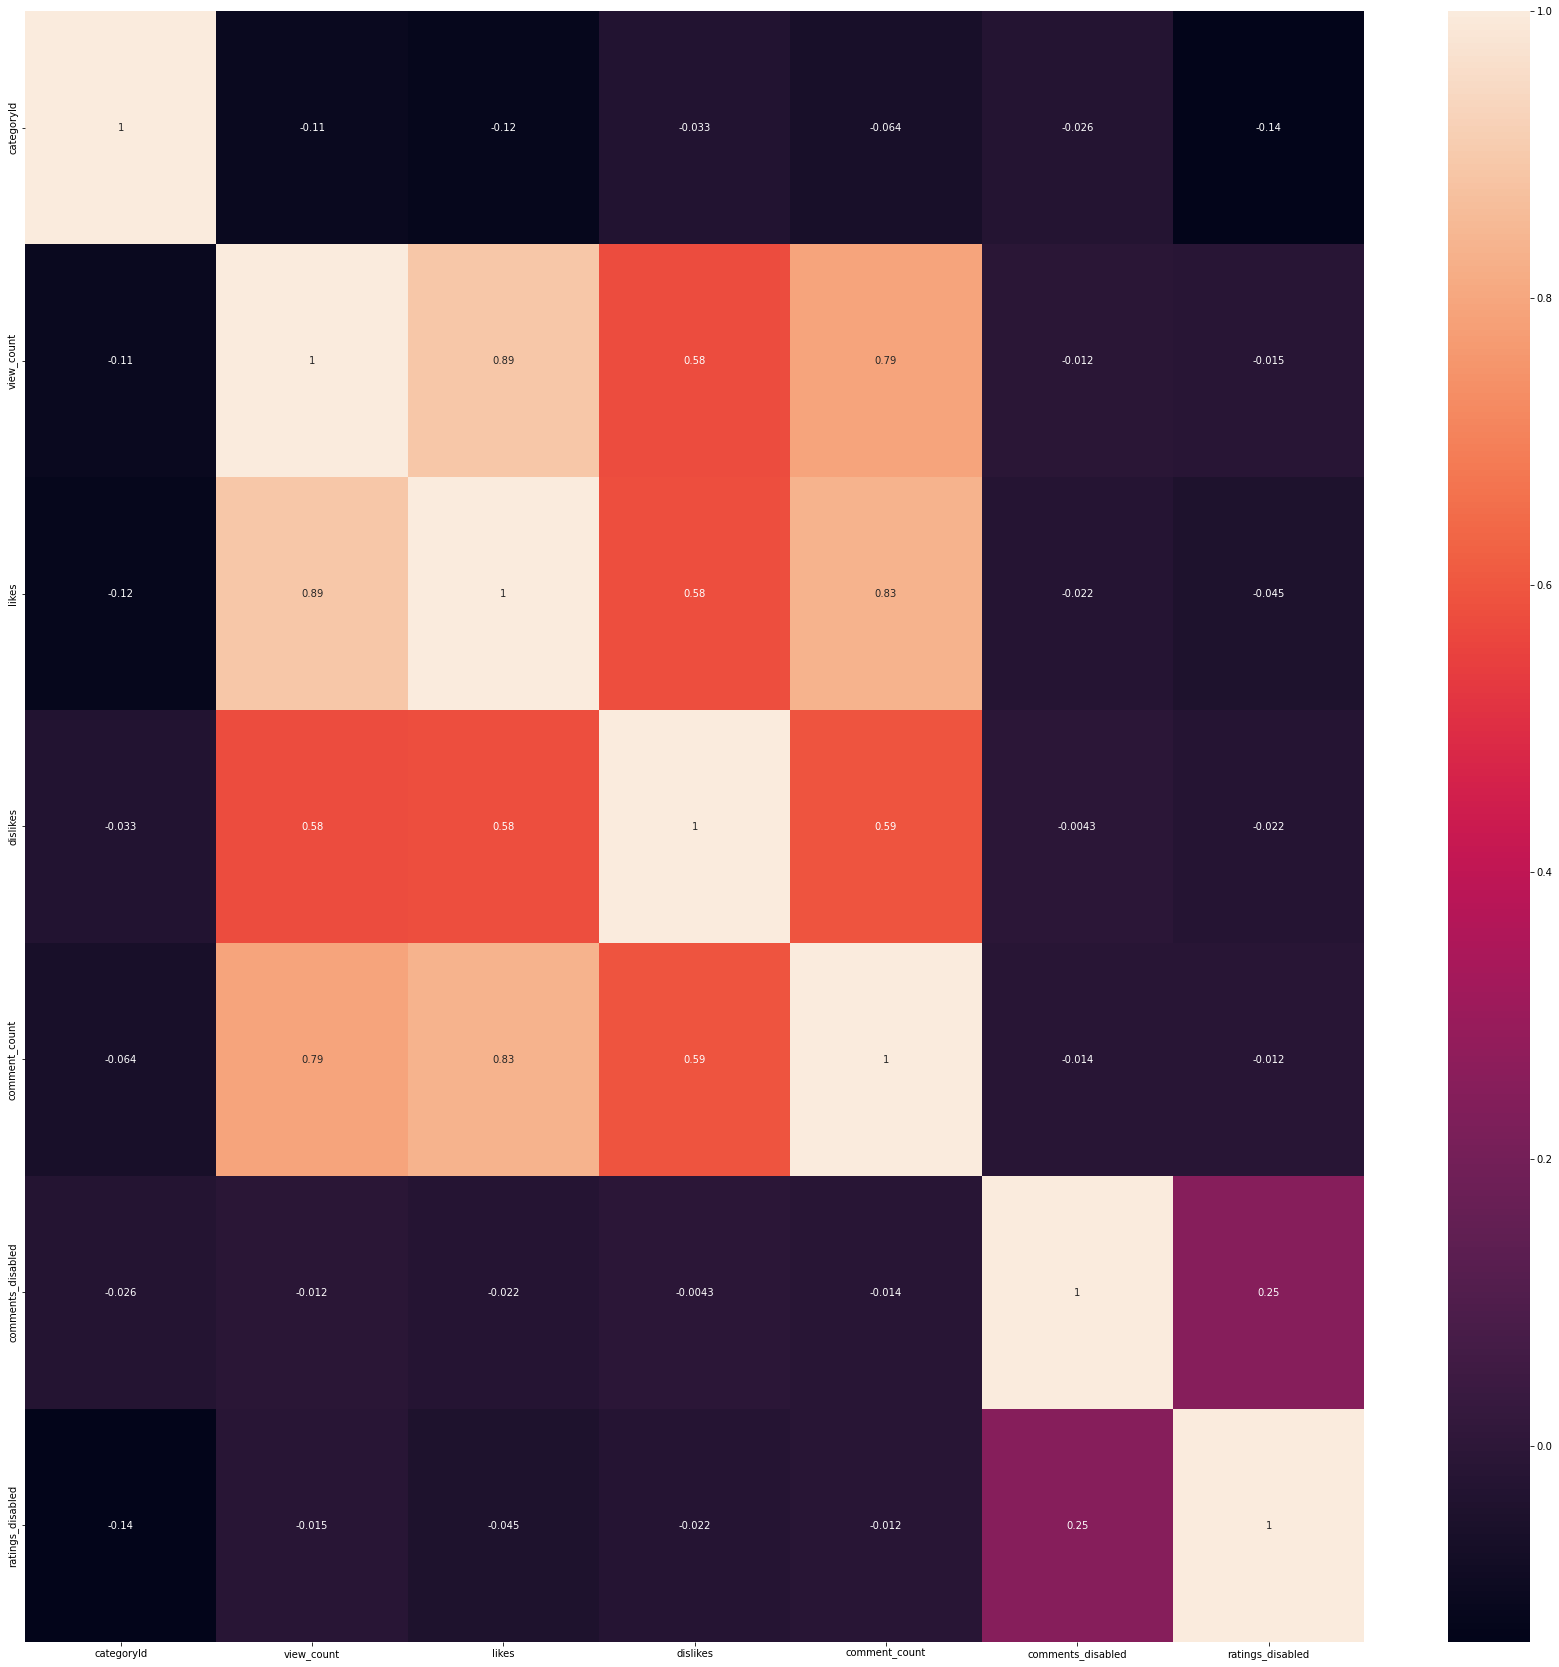

In [42]:
#Correlation heatmap for JP
corr = JP_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

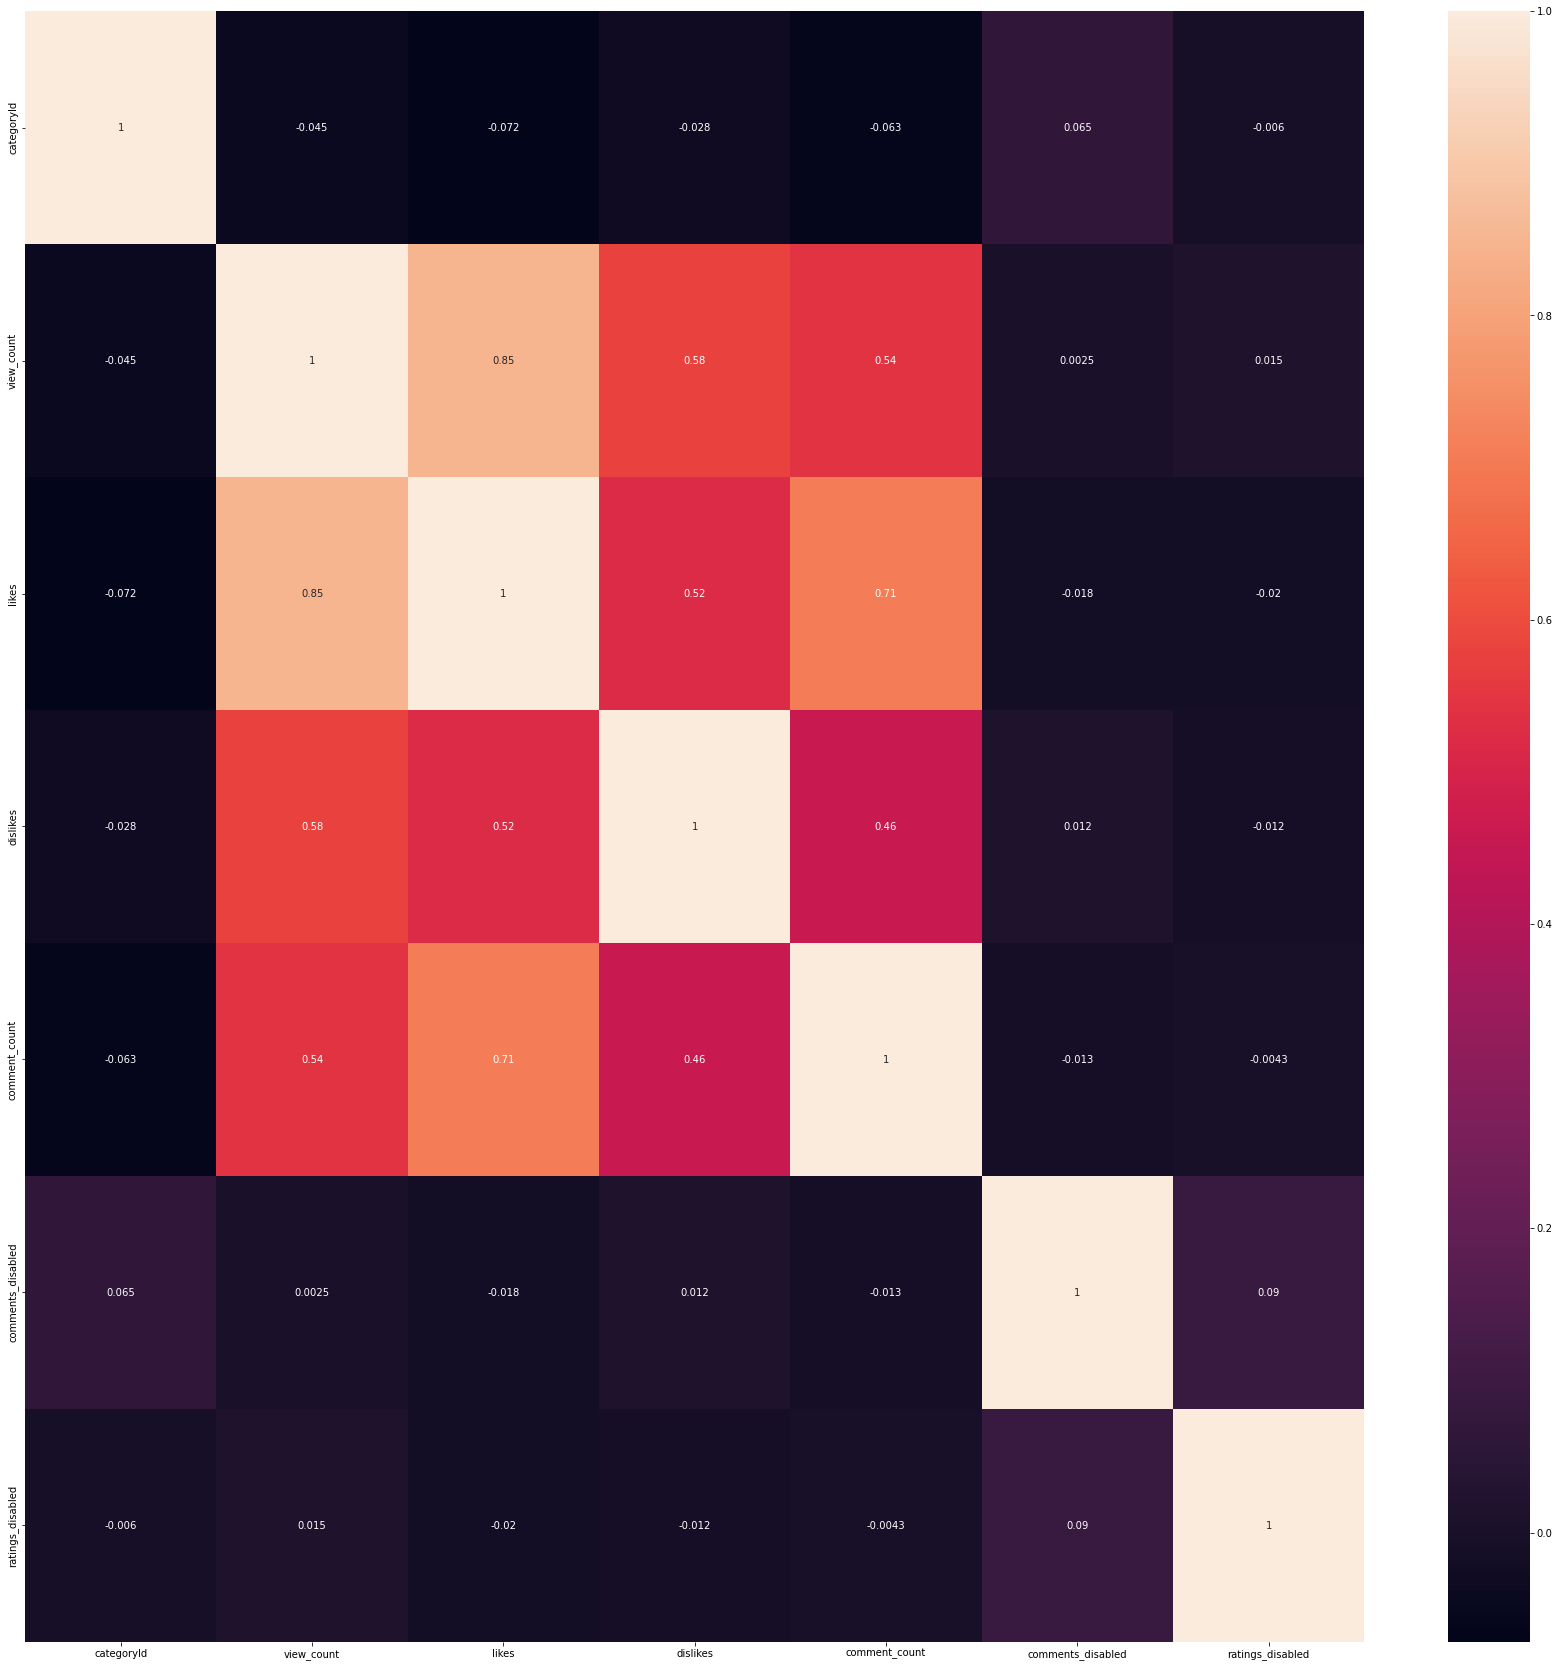

In [43]:
#Correlation heatmap for DE
corr = DE_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

Correlation heatmap are different for each countries. some are similar though

# 

<AxesSubplot:xlabel='likes', ylabel='view_count'>

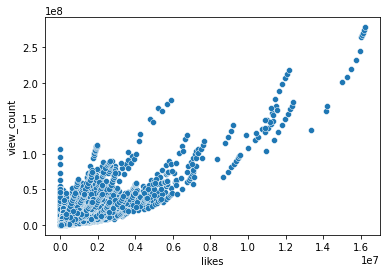

In [44]:
#scatterplot BR view count, likes
sns.scatterplot(x='likes', y='view_count', data=BR_df)

<AxesSubplot:xlabel='likes', ylabel='view_count'>

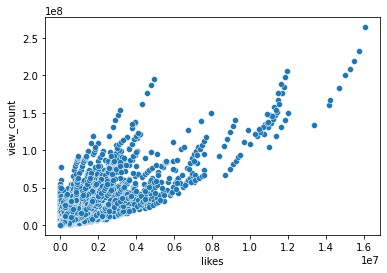

In [45]:
#scatterplot CA view count, likes
sns.scatterplot(x='likes', y='view_count', data=CA_df)

<AxesSubplot:xlabel='likes', ylabel='view_count'>

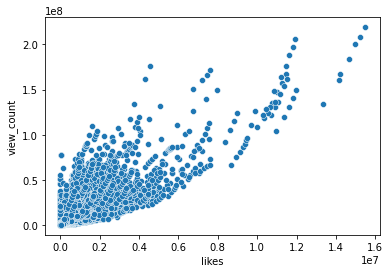

In [46]:
#scatterplot DE view count, likes
sns.scatterplot(x='likes', y='view_count', data=DE_df)

<AxesSubplot:xlabel='likes', ylabel='view_count'>

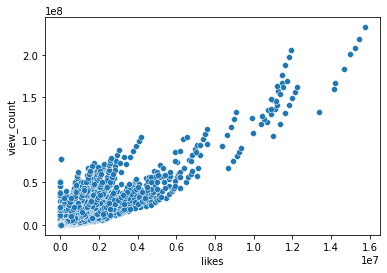

In [47]:
#scatterplot FR view count, likes
sns.scatterplot(x='likes', y='view_count', data=FR_df)

<AxesSubplot:xlabel='likes', ylabel='view_count'>

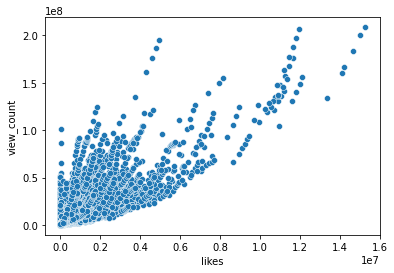

In [48]:
#scatterplot GB view count, likes
sns.scatterplot(x='likes', y='view_count', data=GB_df)

<AxesSubplot:xlabel='likes', ylabel='view_count'>

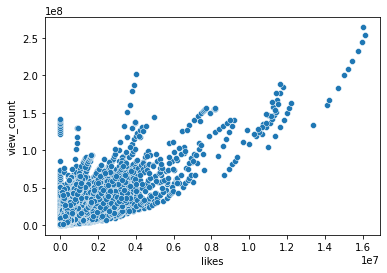

In [49]:
#scatterplot IN view count, likes
sns.scatterplot(x='likes', y='view_count', data=IN_df)

<AxesSubplot:xlabel='likes', ylabel='view_count'>

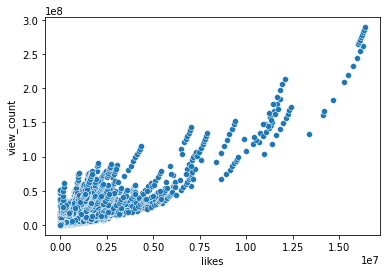

In [50]:
#scatterplot JP view count, likes
sns.scatterplot(x='likes', y='view_count', data=JP_df)

<AxesSubplot:xlabel='likes', ylabel='view_count'>

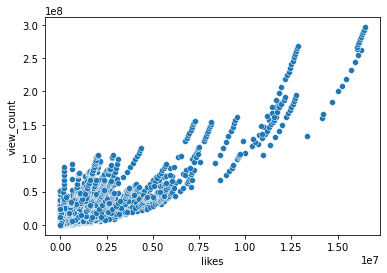

In [51]:
#scatterplot KR view count, likes
sns.scatterplot(x='likes', y='view_count', data=KR_df)

<AxesSubplot:xlabel='likes', ylabel='view_count'>

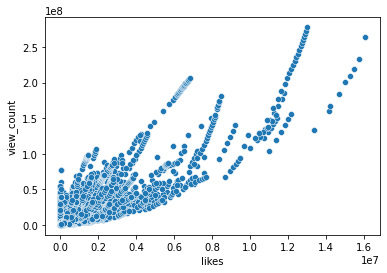

In [52]:
#scatterplot US view count, likes
sns.scatterplot(x='likes', y='view_count', data=US_df)

<AxesSubplot:xlabel='dislikes', ylabel='view_count'>

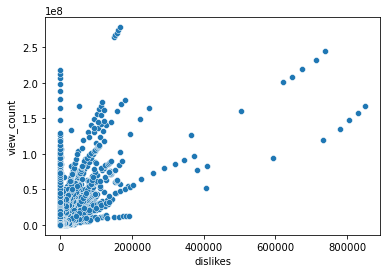

In [53]:
#scatterplot BR view count, likes
sns.scatterplot(x='dislikes', y='view_count', data=BR_df)

<AxesSubplot:xlabel='dislikes', ylabel='view_count'>

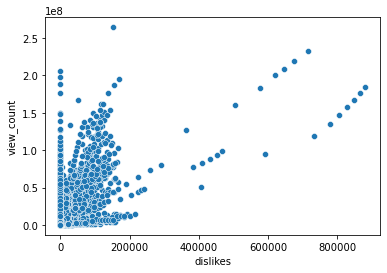

In [54]:
#scatterplot CA view count, likes
sns.scatterplot(x='dislikes', y='view_count', data=CA_df)

<AxesSubplot:xlabel='dislikes', ylabel='view_count'>

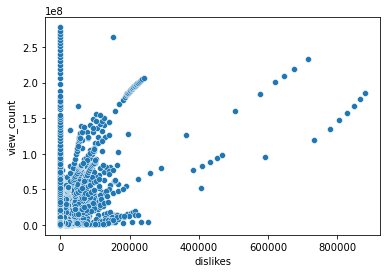

In [55]:
#scatterplot US view count, likes
sns.scatterplot(x='dislikes', y='view_count', data=US_df)

Similar pattern for dislikes to viewcount

<AxesSubplot:xlabel='comment_count', ylabel='view_count'>

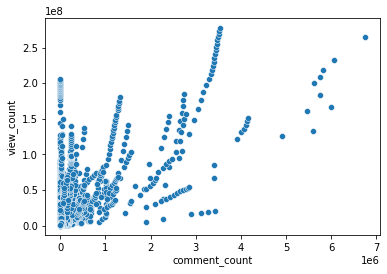

In [56]:
#scatterplot US view count, comment_count
sns.scatterplot(x='comment_count', y='view_count', data=US_df)

# Videos with highest view count in select countries

In [57]:
#row of highest view count in US
print(US_df[US_df.view_count == US_df.view_count.max()])

                               title           publishedAt channelTitle  \
152788  BLACKPINK - ‘Pink Venom’ M/V  2022-08-19T04:00:13Z    BLACKPINK   

        categoryId         trending_date  \
152788          10  2022-09-10T00:00:00Z   

                                                     tags  view_count  \
152788  YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...   277791741   

           likes  dislikes  comment_count  comments_disabled  \
152788  12993894         0        3534337              False   

        ratings_disabled                                        description  \
152788             False  BLACKPINK - ‘Pink Venom’ M/VKick in the door W...   

       category  
152788    Music  


In [58]:
#row of highest view count in CA
print(CA_df[CA_df.view_count == CA_df.view_count.max()])

                                  title           publishedAt channelTitle  \
56330  BTS (방탄소년단) 'Butter' Official MV  2021-05-21T03:46:13Z  HYBE LABELS   

       categoryId         trending_date                             tags  \
56330          10  2021-05-30T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   

       view_count     likes  dislikes  comment_count  comments_disabled  \
56330   264407389  16021548    150990        6738536              False   

       ratings_disabled                                        description  \
56330             False  BTS (방탄소년단) 'Butter' Official MV Credits: Dire...   

      category  
56330    Music  


In [59]:
#row of highest view count in GB
print(GB_df[GB_df.view_count == GB_df.view_count.max()])

                                   title           publishedAt  \
2953  BTS (방탄소년단) 'Dynamite' Official MV  2020-08-21T03:58:10Z   

        channelTitle  categoryId         trending_date  \
2953  Big Hit Labels          10  2020-08-26T00:00:00Z   

                                 tags  view_count     likes  dislikes  \
2953  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   208581468  15246514    646350   

      comment_count  comments_disabled  ratings_disabled  \
2953        5744360              False             False   

                                            description category  
2953  BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...    Music  


In [60]:
#row of highest view count in JP
print(JP_df[JP_df.view_count == JP_df.view_count.max()])

                                  title           publishedAt channelTitle  \
57780  BTS (방탄소년단) 'Butter' Official MV  2021-05-21T03:46:13Z  HYBE LABELS   

       categoryId         trending_date                             tags  \
57780          10  2021-06-03T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   

       view_count     likes  dislikes  comment_count  comments_disabled  \
57780   289350312  16369715    175204        6889393              False   

       ratings_disabled                                        description  \
57780             False  BTS (방탄소년단) 'Butter' Official MV Credits: Dire...   

      category  
57780    Music  


In [61]:
#row of highest view count in MX
print(MX_df[MX_df.view_count == MX_df.view_count.max()])

                                  title           publishedAt channelTitle  \
56991  BTS (방탄소년단) 'Butter' Official MV  2021-05-21T03:46:13Z  HYBE LABELS   

       categoryId         trending_date                             tags  \
56991          10  2021-06-01T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   

       view_count     likes  dislikes  comment_count  comments_disabled  \
56991   278080610  16213758    165082        6817451              False   

       ratings_disabled                                        description  \
56991             False  BTS (방탄소년단) 'Butter' Official MV Credits: Dire...   

      category  
56991    Music  


In [62]:
#row of highest view count in RU
print(RU_df[RU_df.view_count == RU_df.view_count.max()])

                                   title           publishedAt  \
2487  BTS (방탄소년단) 'Dynamite' Official MV  2020-08-21T03:58:10Z   

        channelTitle  categoryId         trending_date  \
2487  Big Hit Labels          10  2020-08-24T00:00:00Z   

                                 tags  view_count     likes  dislikes  \
2487  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   183532509  14678180    576865   

      comment_count  comments_disabled  ratings_disabled  \
2487        5748681              False             False   

                                            description category  
2487  BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...    Music  


# Videos with highest likes

In [63]:
#row of highest likes in US
print(US_df[US_df.likes == US_df.likes.max()])

                                  title           publishedAt channelTitle  \
56374  BTS (방탄소년단) 'Butter' Official MV  2021-05-21T03:46:13Z  HYBE LABELS   

       categoryId         trending_date                             tags  \
56374          10  2021-05-30T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   

       view_count     likes  dislikes  comment_count  comments_disabled  \
56374   264407389  16021534    150989        6738537              False   

       ratings_disabled                                        description  \
56374             False  BTS (방탄소년단) 'Butter' Official MV Credits: Dire...   

      category  
56374    Music  


In [64]:
#row of highest likes in CA
print(CA_df[CA_df.likes == CA_df.likes.max()])

                                  title           publishedAt channelTitle  \
56330  BTS (방탄소년단) 'Butter' Official MV  2021-05-21T03:46:13Z  HYBE LABELS   

       categoryId         trending_date                             tags  \
56330          10  2021-05-30T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   

       view_count     likes  dislikes  comment_count  comments_disabled  \
56330   264407389  16021548    150990        6738536              False   

       ratings_disabled                                        description  \
56330             False  BTS (방탄소년단) 'Butter' Official MV Credits: Dire...   

      category  
56330    Music  


I'm expecting it'll be kpop for all the rest

# dislikes

In [65]:
#row of highest dislikes in US
print(US_df[US_df.dislikes == US_df.dislikes.max()])

                                                title           publishedAt  \
4980  BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V  2020-08-28T04:00:11Z   

     channelTitle  categoryId         trending_date  \
4980    BLACKPINK          10  2020-09-05T00:00:00Z   

                                                   tags  view_count     likes  \
4980  YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...   184778248  11795670   

      dislikes  comment_count  comments_disabled  ratings_disabled  \
4980    879354        2735997              False             False   

                                            description category  
4980  BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...    Music  


In [66]:
#row of highest dislikes in CA
print(CA_df[CA_df.dislikes == CA_df.dislikes.max()])

                                                title           publishedAt  \
4981  BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V  2020-08-28T04:00:11Z   

     channelTitle  categoryId         trending_date  \
4981    BLACKPINK          10  2020-09-05T00:00:00Z   

                                                   tags  view_count     likes  \
4981  YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...   184778248  11795687   

      dislikes  comment_count  comments_disabled  ratings_disabled  \
4981    879357        2736022              False             False   

                                            description category  
4981  BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...    Music  


In [67]:
#row of highest dislikes in GB
print(GB_df[GB_df.dislikes == GB_df.dislikes.max()])

                                                title           publishedAt  \
4797  BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V  2020-08-28T04:00:11Z   

     channelTitle  categoryId         trending_date  \
4797    BLACKPINK          10  2020-09-04T00:00:00Z   

                                                   tags  view_count     likes  \
4797  YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...   176467113  11645396   

      dislikes  comment_count  comments_disabled  ratings_disabled  \
4797    865075        2722456              False             False   

                                            description category  
4797  BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...    Music  


In [68]:
#row of highest dislikes in MX
print(MX_df[MX_df.dislikes == MX_df.dislikes.max()])

                                                title           publishedAt  \
4799  BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V  2020-08-28T04:00:11Z   

     channelTitle  categoryId         trending_date  \
4799    BLACKPINK          10  2020-09-05T00:00:00Z   

                                                   tags  view_count     likes  \
4799  YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...   184778248  11795721   

      dislikes  comment_count  comments_disabled  ratings_disabled  \
4799    879359        2736000              False             False   

                                            description category  
4799  BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...    Music  


In [69]:
#row of highest dislikes in RU
print(RU_df[RU_df.dislikes == RU_df.dislikes.max()])

                                                title           publishedAt  \
3948  BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V  2020-08-28T04:00:11Z   

     channelTitle  categoryId         trending_date  \
3948    BLACKPINK          10  2020-08-31T00:00:00Z   

                                                   tags  view_count     likes  \
3948  YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...   134856366  10751100   

      dislikes  comment_count  comments_disabled  ratings_disabled  \
3948    778804        2624414              False             False   

                                            description category  
3948  BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...    Music  


In [70]:
#row of highest dislikes in DE
print(DE_df[DE_df.dislikes == DE_df.dislikes.max()])

                                                title           publishedAt  \
4582  BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V  2020-08-28T04:00:11Z   

     channelTitle  categoryId         trending_date  \
4582    BLACKPINK          10  2020-09-03T00:00:00Z   

                                                   tags  view_count     likes  \
4582  YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...   167334429  11474616   

      dislikes  comment_count  comments_disabled  ratings_disabled  \
4582    848975        2710904              False             False   

                                            description category  
4582  BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...    Music  


In [71]:
#row of highest dislikes in IN
print(IN_df[IN_df.dislikes == IN_df.dislikes.max()])

                                                  title           publishedAt  \
2070  Sadak 2 | Official Trailer | Sanjay | Pooja | ...  2020-08-12T04:31:41Z   

      channelTitle  categoryId         trending_date  \
2070  FoxStarHindi          24  2020-08-22T00:00:00Z   

                                                   tags  view_count   likes  \
2070  sadak|sadak 2|mahesh bhatt|vishesh films|pooja...    66344227  680408   

      dislikes  comment_count  comments_disabled  ratings_disabled  \
2070  12341474        1080479              False             False   

                                            description       category  
2070  Three Streams. Three Stories. One Journey. Sta...  Entertainment  


In [72]:
#row of highest dislikes in JP
print(JP_df[JP_df.dislikes == JP_df.dislikes.max()])

                                                title           publishedAt  \
4976  BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V  2020-08-28T04:00:11Z   

     channelTitle  categoryId         trending_date  \
4976    BLACKPINK          10  2020-09-05T00:00:00Z   

                                                   tags  view_count     likes  \
4976  YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...   184778248  11795704   

      dislikes  comment_count  comments_disabled  ratings_disabled  \
4976    879359        2736001              False             False   

                                            description category  
4976  BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...    Music  


# US Dataframe Regression Exp 1

<AxesSubplot:xlabel='view_count', ylabel='likes'>

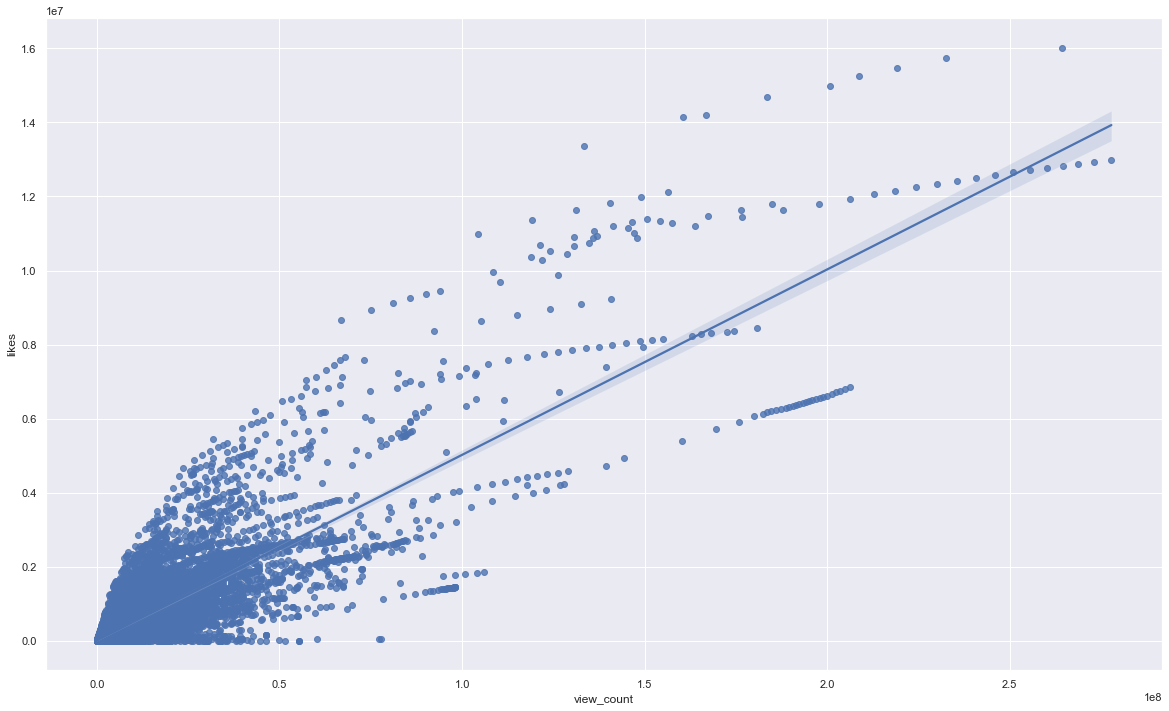

In [155]:
#US_df regplot for likes and view count
sns.regplot(x='view_count', y='likes', data=US_df)


In [73]:
X = US_df[['view_count']]
y = US_df['likes']
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [74]:
# Initialize a linear regression model object
lr = LinearRegression() 

# Fit the linear regression model object to our data
lr.fit(x_train, y_train)

LinearRegression()

In [75]:
# The coefficients
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [0.0496075]
Intercept:  8109.947221414259


In [76]:
#coefficient is 0.05: this means for each increase in views, likes increases by 0.05

In [77]:
0.05*1000000-6691

43309.0

In [78]:
#a video which has 1,000,000 views will have 43,309, likes

In [79]:
coefficient = lr.coef_
intercept = lr.intercept_
views = 1000000

In [80]:
viewCountRegression = coefficient * views - intercept
viewCountRegression

array([41497.55607605])

In [81]:
views = 277791741
viewCountRegression = coefficient * views - intercept
viewCountRegression

#based on the actual view count from US_df for the specific video (KPOP), the actual video got 12,993,894 likes.
#The regression and actual like count is somewhat similar

array([13772444.76044357])

In [82]:
lr.predict([[277791741]])

C:\Users\agpju\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13788664.6548864])

# US Regression Exp 2

<AxesSubplot:xlabel='view_count', ylabel='dislikes'>

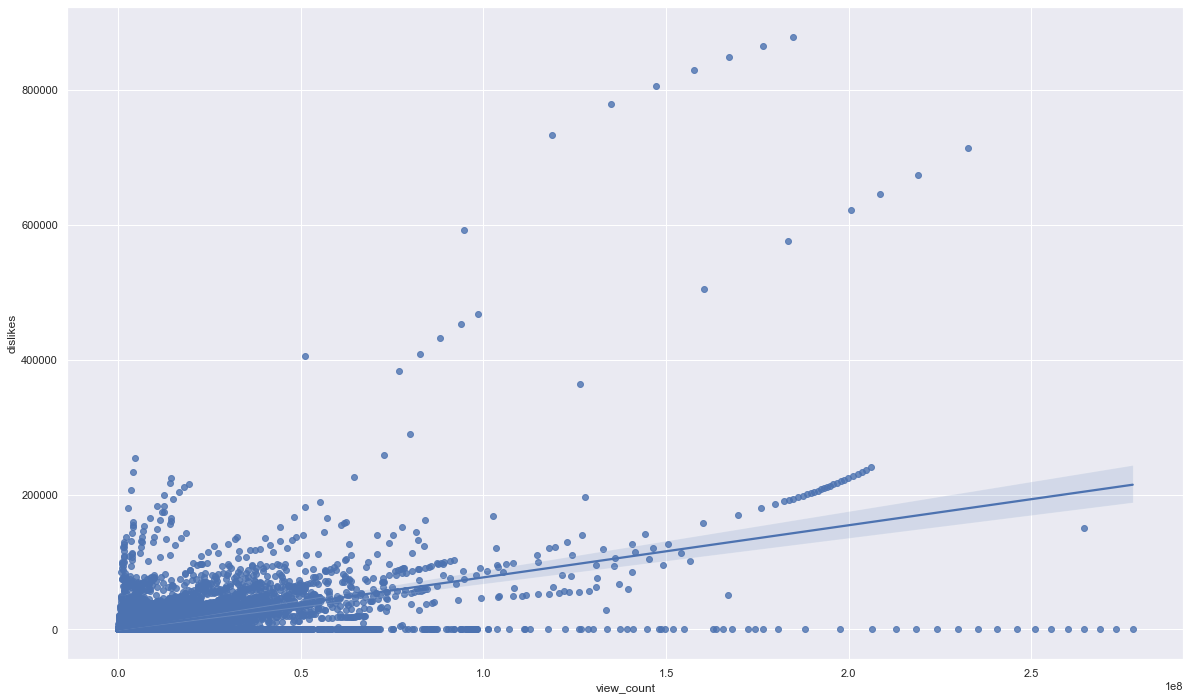

In [154]:
#US_df regplot for likes and view count
sns.regplot(x='view_count', y='dislikes', data=US_df)


In [83]:
#Similar to Experiment 1, except we're predicting dislikes
X = US_df[['view_count']]
y = US_df['dislikes']
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [84]:
# Initialize a linear regression model object
lr = LinearRegression() 

# Fit the linear regression model object to our data
lr.fit(x_train, y_train)

LinearRegression()

In [85]:
# The coefficients
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)
print("Coefficient is" , str(lr.coef_[0]) , "this means that for every increase in view, dislikes increases by" , str(lr.coef_[0]))

Coefficients:  [0.00079588]
Intercept:  -216.13935604711446
Coefficient is 0.0007958775622632012 this means that for every increase in view, dislikes increases by 0.0007958775622632012


In [86]:
coefficient = lr.coef_
intercept = lr.intercept_
views = 1000000

In [87]:
viewCountRegression = coefficient * views - intercept
print(viewCountRegression)

[1012.01691831]


In [88]:
views = 277791741
viewCountRegression = coefficient * views - intercept
viewCountRegression

array([221304.35299998])

In [89]:
lr.predict([[277791741]])
#The Blackpink example from experiment 1 has 0 dislikes. maybe not a great example?

C:\Users\agpju\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([220872.07428788])

In [90]:
test = US_df.sort_values(['likes'],ascending=False)
test

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
56374,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,Music
3358,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,Music
3137,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-27T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,219110491,15460822,674291,5810680,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,Music
2894,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-26T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246496,646349,5744496,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,Music
2653,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-25T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994034,621578,5623570,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94458,Jury finds Kyle Rittenhouse not guilty on all ...,2021-11-19T18:21:35Z,Fox News,25,2021-11-21T00:00:00Z,Fox News Channel|Fox News|News|live|live strea...,1531148,0,0,0,True,True,The jury will announce the verdict in Kyle Rit...,News & Politics
98648,a fan wanted to hang out.. So I Built His DREA...,2021-12-11T19:51:29Z,FaZe Rug,24,2021-12-14T00:00:00Z,faze rug|rug|rugfaze|fazerug,2580717,0,0,7678,False,True,This was amazing!!One of my biggest fans wante...,Entertainment
60244,How to Serve Drinks in the June's Journey Dete...,2021-06-07T10:52:23Z,June's Journey,20,2021-06-09T00:00:00Z,[None],356581,0,0,1477,False,True,Play June's Journey Now! https://woo.ga/YTPlay...,Gaming
30631,Galaxy Unpacked January 2021: Official Replay ...,2021-01-14T17:27:21Z,Samsung,28,2021-01-16T00:00:00Z,Samsung|Samsung Electronics|Galaxy|Mobile|Unpa...,33721137,0,0,0,True,True,It’s the moment we’ve all been waiting for. #S...,Science & Technology


In [91]:
views = 232649205
viewCountRegression = coefficient * views - intercept
viewCountRegression

array([185376.42149392])

In [92]:
#dislike doesn't seem to be too accurate

# Experiment 3 - Using view_count and comment_count to predict dislikes

In [93]:
#Using view_count and comment_count to predict dislikes
X = US_df[['view_count', 'comment_count']]
y = US_df['dislikes']
x_train, x_test, y_train, y_test = train_test_split(X, y)


In [94]:
# Initialize a linear regression model object
lr = LinearRegression() 

# Fit the linear regression model object to our data
lr.fit(x_train, y_train)

LinearRegression()

In [95]:
# The coefficients
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)
print("Coefficient is" , str(lr.coef_[0]) , "this means that for every increase in view, dislikes increases by" , str(lr.coef_[0]))

Coefficients:  [0.00065095 0.01569534]
Intercept:  -40.525283520397124
Coefficient is 0.0006509485867260885 this means that for every increase in view, dislikes increases by 0.0006509485867260885


In [96]:
lr.predict([[264407389, 6738537]])
#Video with 264407389 views and 6738537 comments gets 290236 dislikes

C:\Users\agpju\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([277838.74919977])

# Experiment 4, same as 3 except predicting likes

In [97]:
#Using view_count and comment_count to predict dislikes
X = US_df[['view_count', 'comment_count']]
y = US_df['likes']
x_train, x_test, y_train, y_test = train_test_split(X, y)


In [98]:
# Initialize a linear regression model object
lr = LinearRegression() 

# Fit the linear regression model object to our data
lr.fit(x_train, y_train)

LinearRegression()

In [99]:
lr.predict([[264407389, 6738537]])
#Video with 264407389 views and 6738537 comments gets 21181753 likes

C:\Users\agpju\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22397239.84220865])

Experiment 3 and 4 are trash

<AxesSubplot:xlabel='view_count', ylabel='likes'>

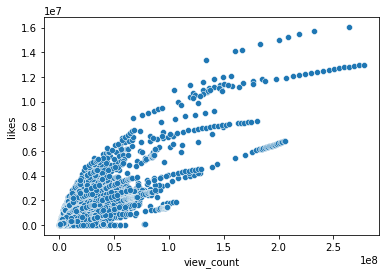

In [100]:
sns.scatterplot(data=US_df, x='view_count', y='likes')

<AxesSubplot:xlabel='view_count'>

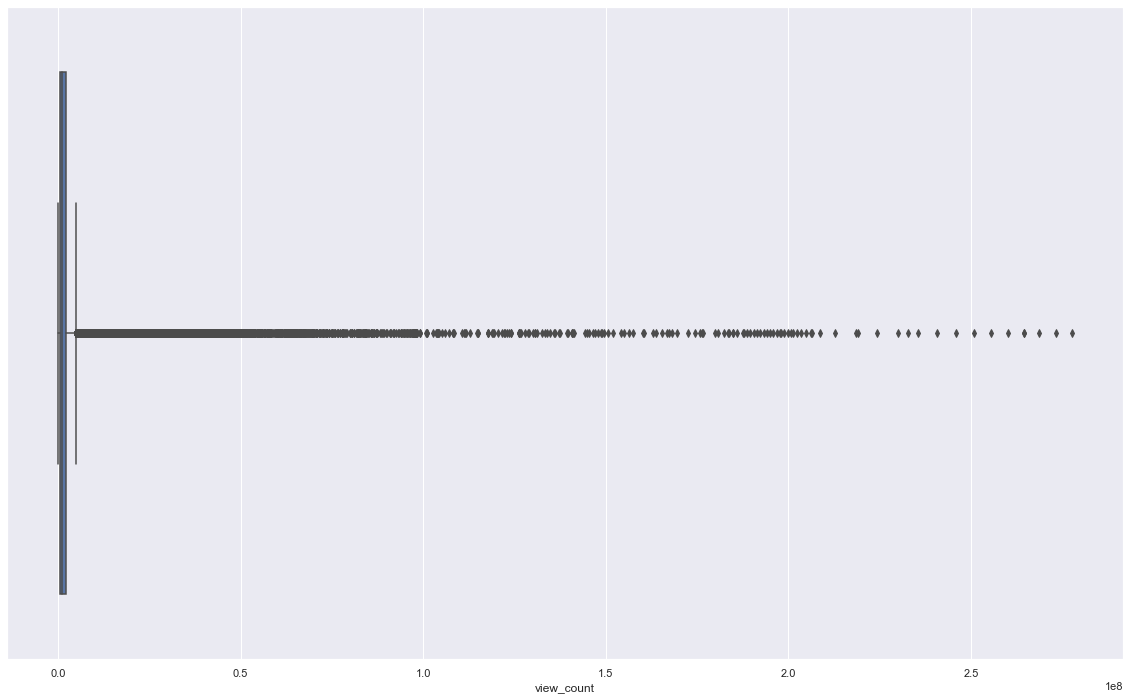

In [101]:
sns.set(rc={"figure.figsize":(20, 12)})
sns.boxplot(x=US_df['view_count'])

<AxesSubplot:xlabel='likes'>

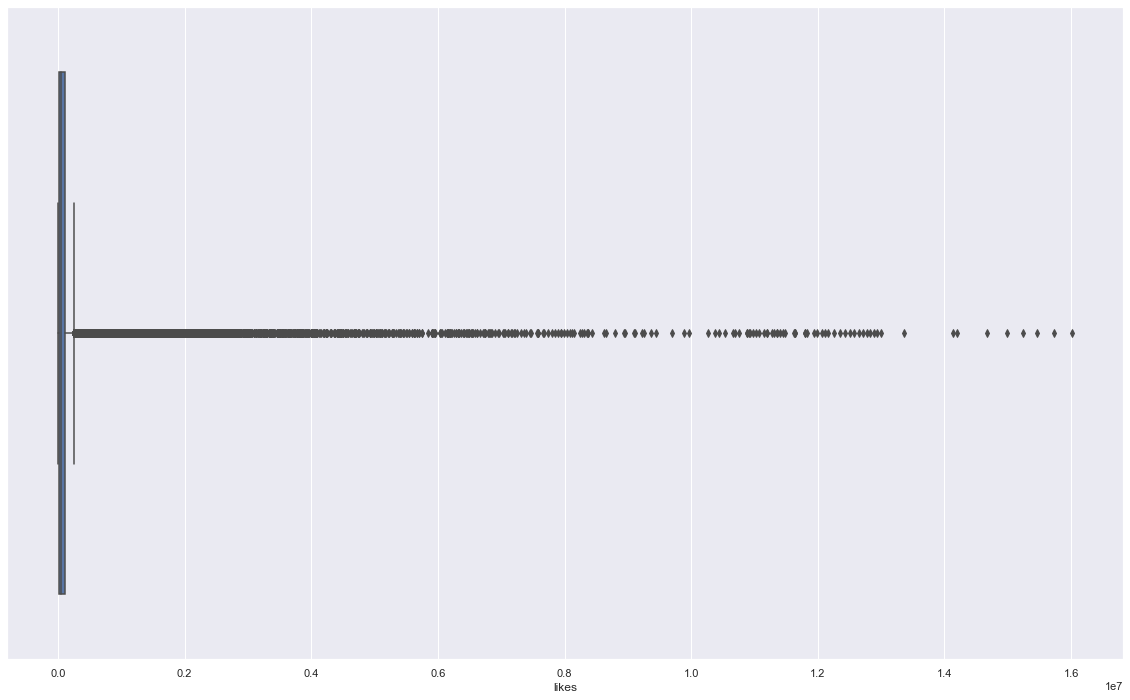

In [102]:
sns.set(rc={"figure.figsize":(20, 12)})
sns.boxplot(x=US_df['likes'])

<AxesSubplot:xlabel='dislikes'>

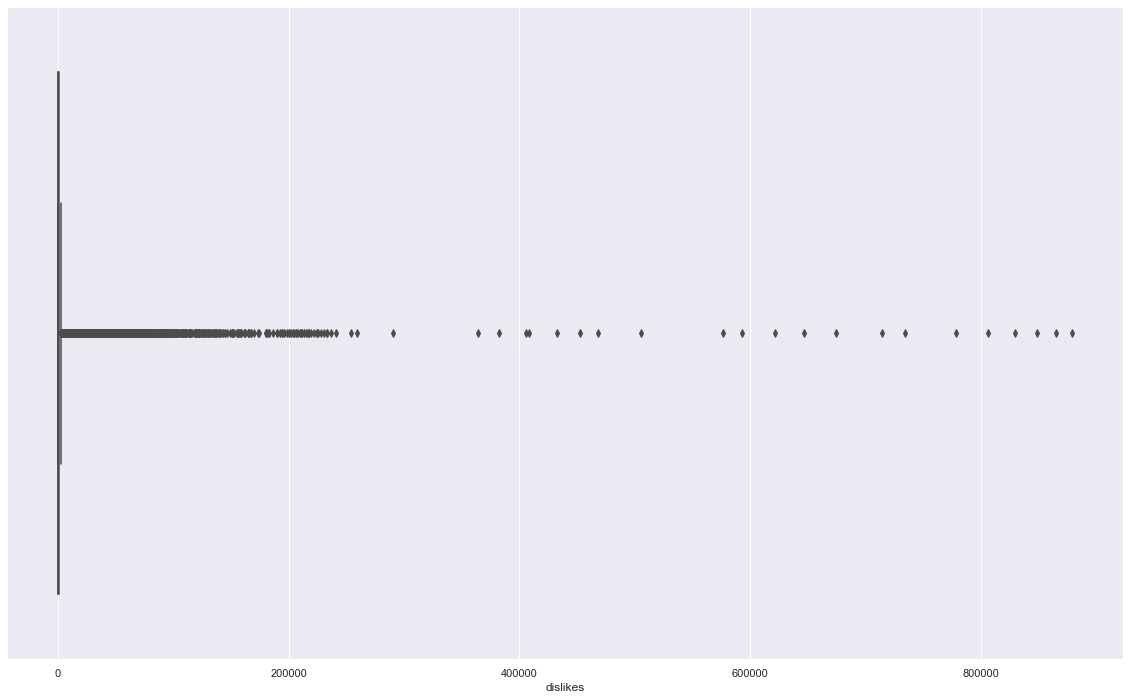

In [107]:
sns.boxplot(data=US_df, x='dislikes')

# Experiment 4? 5? i forget. Removing Outliers

In [108]:
min_threshold, max_threshold = US_df.view_count.quantile([0.02, 0.98])
min_threshold, max_threshold

(162644.1, 17003989.260000005)

In [110]:
#saves rows where the view_count is between the min and max threshold. everything else is an outlier
US_df2 = US_df[(US_df.view_count < max_threshold) & (US_df.view_count > min_threshold)]
US_df2.shape

(162230, 14)

In [112]:
US_df.shape

(168990, 14)

In [114]:
change = 168990-162230
print(change,' outliers removed')

6760  outliers removed


<AxesSubplot:xlabel='view_count'>

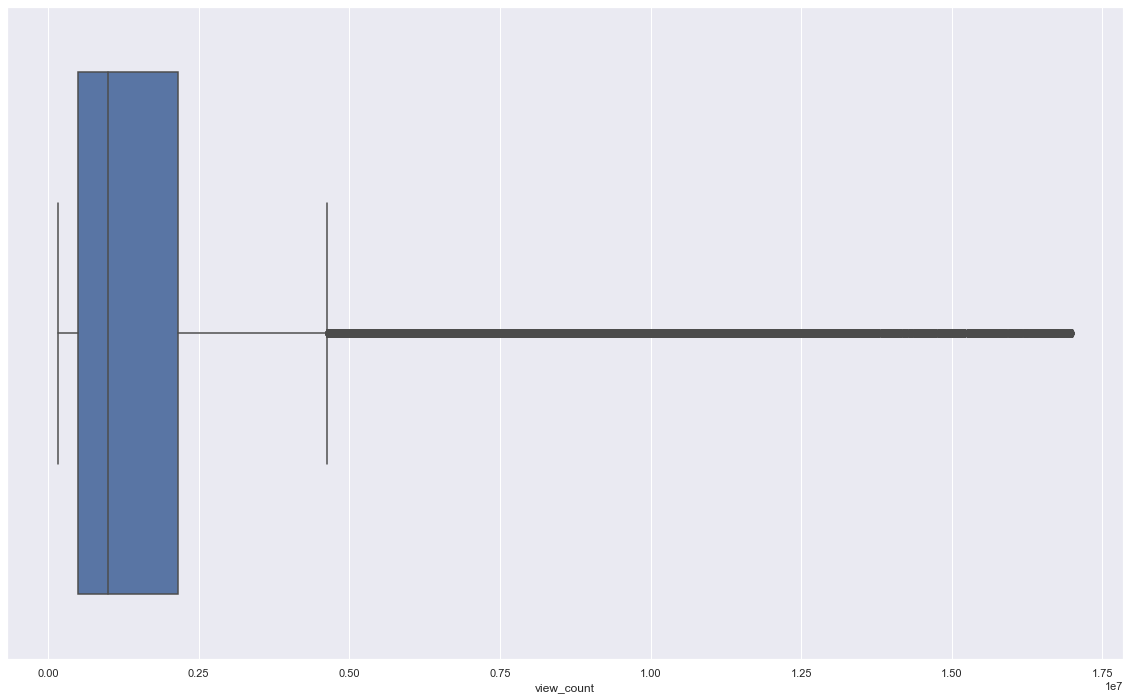

In [115]:
sns.boxplot(data=US_df2, x='view_count')
#positive skew towards the lower end

<AxesSubplot:xlabel='likes'>

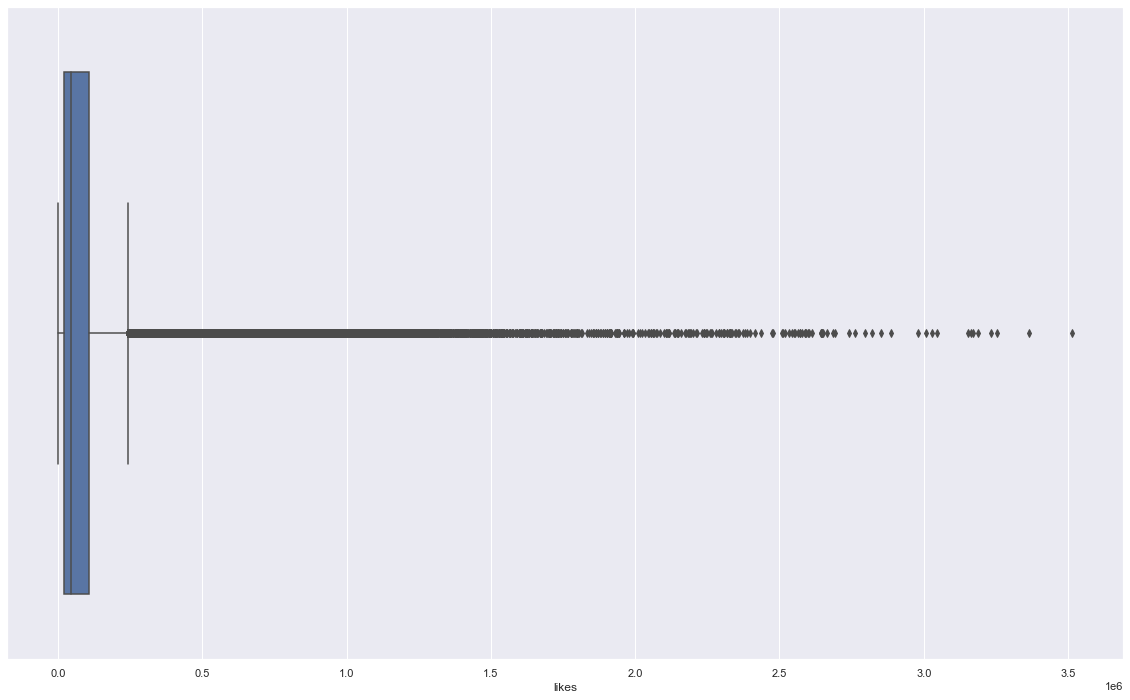

In [116]:
sns.boxplot(data=US_df2, x='likes')


<AxesSubplot:xlabel='dislikes'>

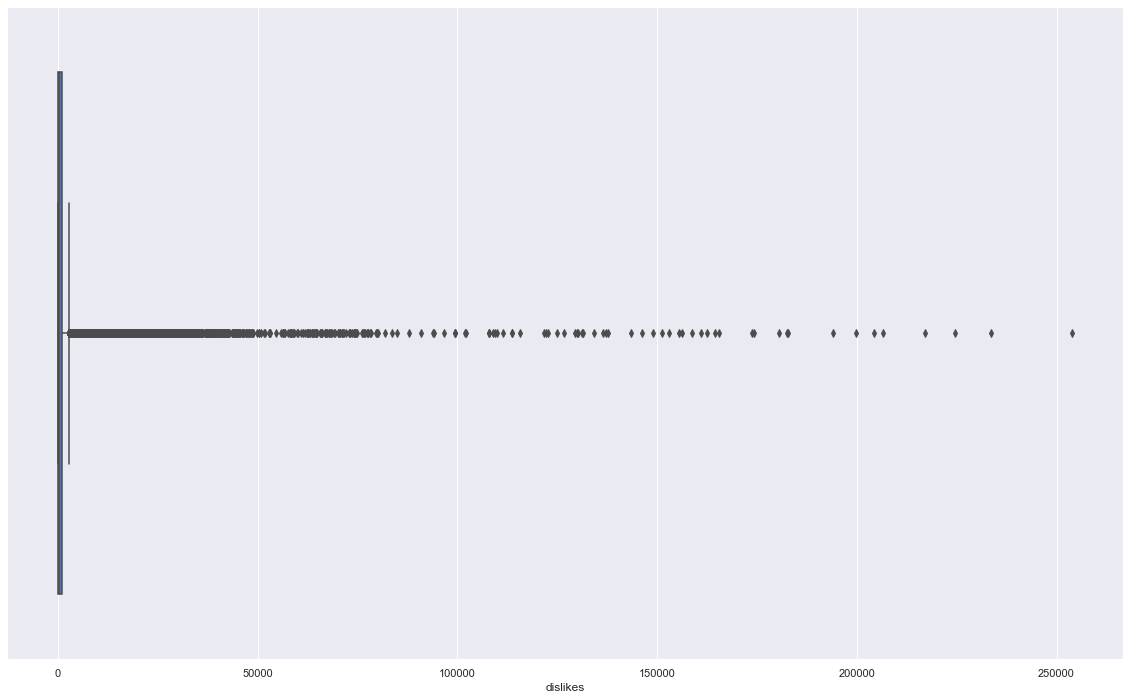

In [117]:
sns.boxplot(data=US_df2, x='dislikes')


<AxesSubplot:xlabel='comment_count'>

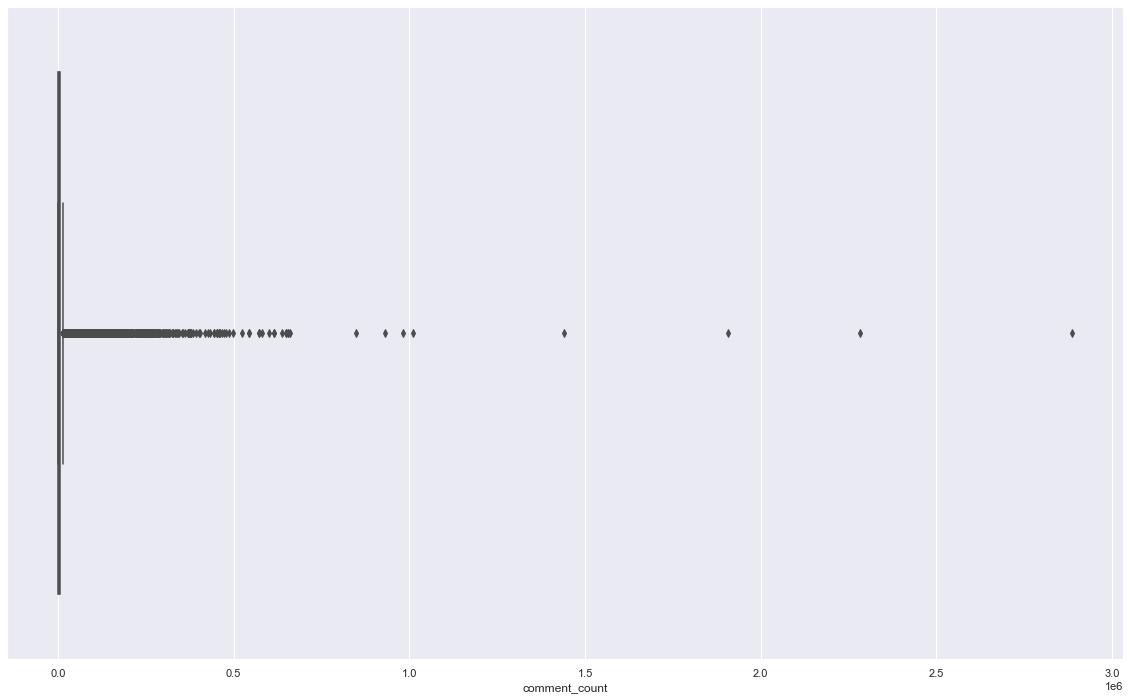

In [118]:
sns.boxplot(data=US_df2, x='comment_count')


In [128]:
X = US_df2[['view_count']]
y = US_df2['likes']
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [129]:
# Initialize a linear regression model object
lr = LinearRegression() 

# Fit the linear regression model object to our data
lr.fit(x_train, y_train)

LinearRegression()

In [130]:
# The coefficients
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)
print("Coefficient is" , str(lr.coef_[0]) , "this means that for every increase in view, dislikes increases by" , str(lr.coef_[0]))

Coefficients:  [0.05168256]
Intercept:  4437.278428356512
Coefficient is 0.05168255643708291 this means that for every increase in view, dislikes increases by 0.05168255643708291


In [131]:
lr.predict([[277791741]])

C:\Users\agpju\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14361424.61041638])

In [132]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                 1.710e+05
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:27:21   Log-Likelihood:            -2.1278e+06
No. Observations:              162230   AIC:                         4.256e+06
Df Residuals:                  162228   BIC:                         4.256e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4223.1981    379.454     11.130      0.000    3479.476    4966.920
view_count     0.0517      0.000    413.466      0.000       0.051       0.052
==============================================================================
Omnibus:                   156926.278   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23031662.000
Skew:                           4.328   Prob(JB):                         0.00
Kurtosis:                      60.726   Cond. No.                     3.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#R-Squared is at .513 -- not very good

In [127]:
X = df[['view_count']]
y = df['likes']

NameError: name 'df' is not defined

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category
